In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# %cd /content/drive/MyDrive/cyclegans/pytorch-CycleGAN-and-pix2pix/


/content/drive/MyDrive/cyclegans/pytorch-CycleGAN-and-pix2pix


In [ ]:
# !pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.7 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408195 sha

 # EXTRACTING THE DATASET


In [ ]:
import tarfile

# Define path
file_path = '/content/drive/MyDrive/cycle_gans/ROIs2017_winter_s1.tar.gz'
extract_path = '/content/drive/MyDrive/cycle_gans/ROIs2017_winter_s1_extracted'

# Extract .tar.gz
with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall(path=extract_path)

print("Extraction completed.")


Extraction completed.



# VISUALIZING AND UNDERSTANDING THE DATASET


In [ ]:
# from PIL import Image
# import matplotlib.pyplot as plt

# # Path to your .tif image
# image_path = '/content/drive/MyDrive/cycle_gans/ROIs2017_winter_s1_extracted/ROIs2017_winter/s1_102/ROIs2017_winter_s1_102_p100.tif'

# # Open and display the image
# img = Image.open(image_path)
# plt.figure(figsize=(8, 8))
# plt.imshow(img, cmap='gray')  # Use cmap='gray' for grayscale images
# plt.axis('off')
# plt.title("TIF Image")
# plt.show()


In [ ]:
# !pip install rasterio


Bands: 13, Shape: 256x256


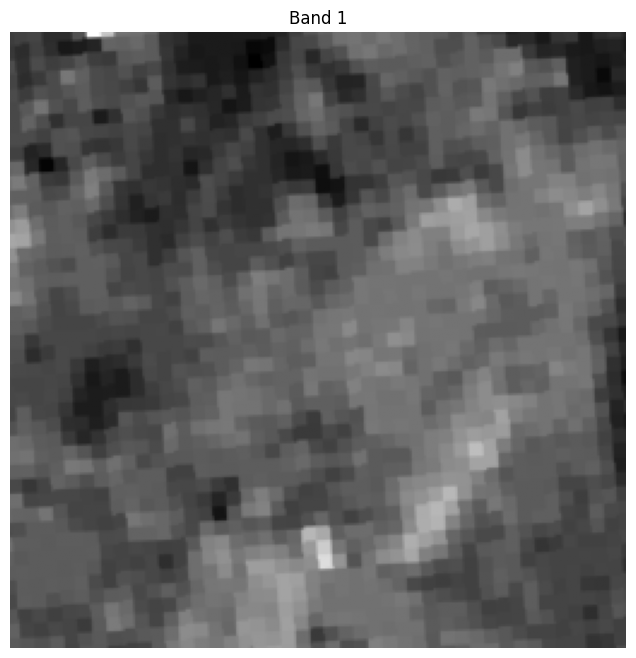

In [ ]:
import rasterio
import matplotlib.pyplot as plt

# Path to the .tif file
image_path = '/content/drive/MyDrive/cycle_gans/ROIs2017_winter_s2_extracted/ROIs2017_winter/s2_102/ROIs2017_winter_s2_102_p109.tif'

# Open and read
with rasterio.open(image_path) as src:
    print(f"Bands: {src.count}, Shape: {src.width}x{src.height}")
    band1 = src.read(1)  # Read the first band

# Visualize Band 1
plt.figure(figsize=(8, 8))
plt.imshow(band1, cmap='gray')
plt.axis('off')
plt.title('Band 1')
plt.show()


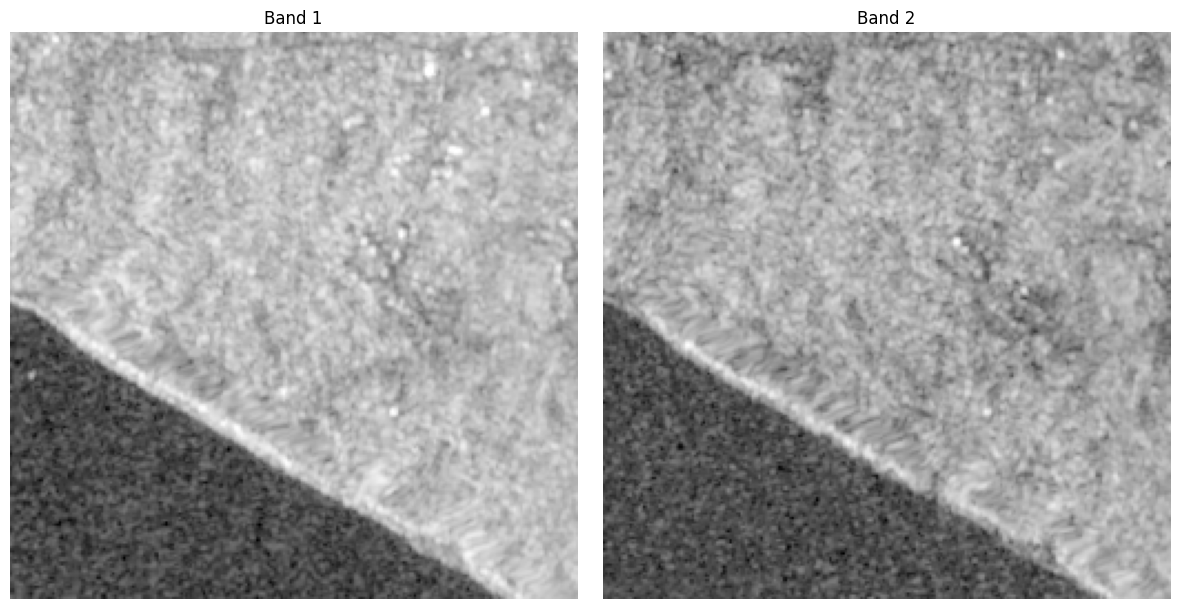

In [ ]:
import rasterio
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/cycle_gans/ROIs2017_winter_s1_extracted/ROIs2017_winter/s1_104/ROIs2017_winter_s1_104_p105.tif'

with rasterio.open(image_path) as src:
    band1 = src.read(1)
    band2 = src.read(2)

# Plotting both bands
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(band1, cmap='gray')
axs[0].set_title("Band 1")
axs[0].axis('off')

axs[1].imshow(band2, cmap='gray')
axs[1].set_title("Band 2")
axs[1].axis('off')

plt.tight_layout()
plt.show()


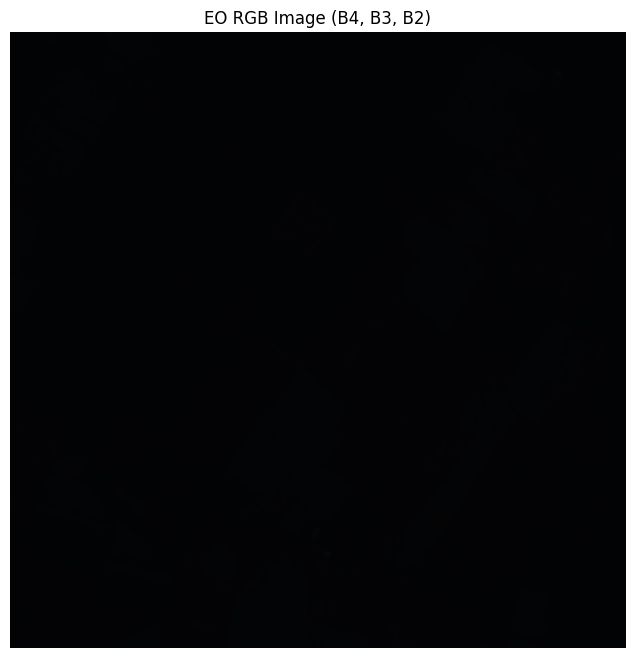

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
eo_image_path = '/content/drive/MyDrive/cycle_gans/ROIs2017_winter_s2_extracted/ROIs2017_winter/s2_102/ROIs2017_winter_s2_102_p109.tif'

def normalize(image):
    image = image.astype(np.float32)
    image = image / 32767.5 - 1  # [-1, 1] normalization for float32 data
    return np.clip(image, -1, 1)

def denormalize(image):
    return np.clip((image + 1) / 2, 0, 1)  # bring back to [0, 1] for visualization

# Load and normalize RGB bands
with rasterio.open(eo_image_path) as src:
    red = normalize(src.read(4))   # B4
    green = normalize(src.read(3)) # B3
    blue = normalize(src.read(2))  # B2

# Stack and denormalize for display
rgb = np.stack([red, green, blue], axis=-1)
rgb = denormalize(rgb)

# Display the RGB image
plt.figure(figsize=(8, 8))
plt.imshow(rgb)
plt.title("EO RGB Image (B4, B3, B2)")
plt.axis('off')
plt.show()


In [ ]:
import rasterio
import numpy as np

eo_image_path = '/content/drive/MyDrive/cycle_gans/ROIs2017_winter_s2_extracted/ROIs2017_winter/s2_102/ROIs2017_winter_s2_102_p100.tif'

with rasterio.open(eo_image_path) as src:
    red_raw = src.read(4)   # B4 - Red
    green_raw = src.read(3) # B3 - Green
    blue_raw = src.read(2)  # B2 - Blue

# Check min/max
print("Red:", np.min(red_raw), np.max(red_raw))
print("Green:", np.min(green_raw), np.max(green_raw))
print("Blue:", np.min(blue_raw), np.max(blue_raw))


Red: 499 2835
Green: 759 2649
Blue: 1220 2937


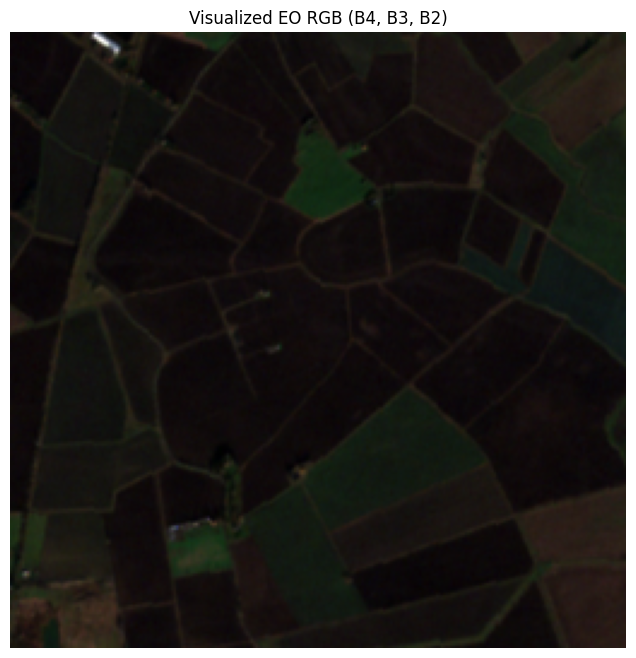

In [ ]:
import matplotlib.pyplot as plt

def normalize_visual(image):
    image = image.astype(np.float32)
    image -= image.min()
    image /= (image.max() + 1e-6)
    return np.clip(image, 0, 1)

# Normalize for visualization
r_vis = normalize_visual(red_raw)
g_vis = normalize_visual(green_raw)
b_vis = normalize_visual(blue_raw)

rgb_vis = np.stack([r_vis, g_vis, b_vis], axis=-1)

# Plot
plt.figure(figsize=(8, 8))
plt.imshow(rgb_vis)
plt.title("Visualized EO RGB (B4, B3, B2)")
plt.axis('off')
plt.show()


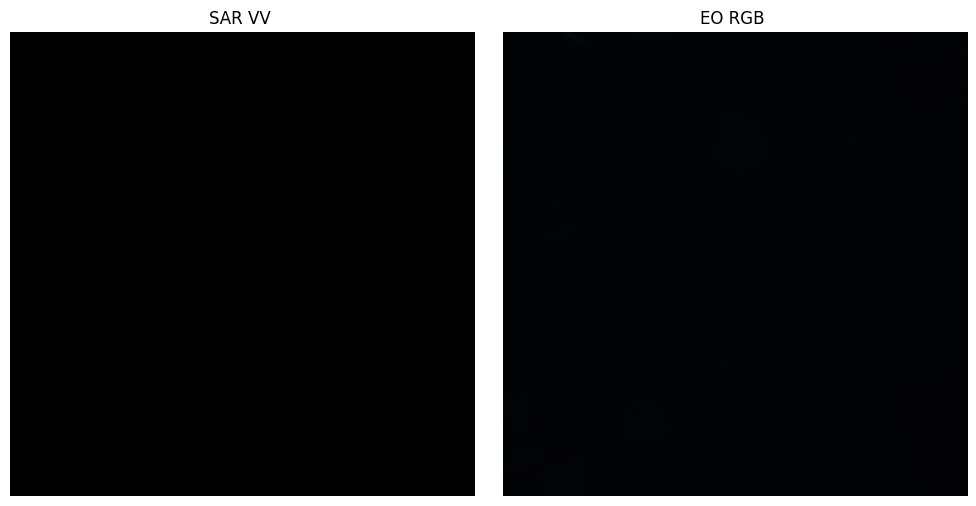

In [ ]:
import matplotlib.pyplot as plt

sar_file = "/content/drive/MyDrive/cycle_gans/ROIs2017_winter_s1_extracted/ROIs2017_winter/s1_102/ROIs2017_winter_s1_102_p100.tif"
eo_file = "/content/drive/MyDrive/cycle_gans/ROIs2017_winter_s2_extracted/ROIs2017_winter/s2_102/ROIs2017_winter_s2_102_p100.tif"
with rasterio.open(sar_file) as src:
        vv = normalize(src.read(1))
        vh = normalize(src.read(2))
        sar = np.stack([vv, vh], axis=-1)

with rasterio.open(eo_file) as src:
        r = normalize(src.read(4))
        g = normalize(src.read(3))
        b = normalize(src.read(2))
        eo = np.stack([r, g, b], axis=-1)

    # Plot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Show SAR image: just show VV channel as grayscale for now
axs[0].imshow(vv, cmap='gray')
axs[0].set_title(f"SAR VV ")
axs[0].axis('off')

    # Show EO image as RGB
axs[1].imshow(to_uint8(eo))
axs[1].set_title(f"EO RGB ")
axs[1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
def to_uint8(x):
    return ((x + 1) * 127.5).astype(np.uint8)


# ANALYSING MIN MAX VALUES

finding the best parameters to normalize the dataset in the range of [-1 to 1]

In [ ]:
import rasterio
import numpy as np
from pathlib import Path

# Set your EO or SAR folder path
folder = Path("/content/drive/MyDrive/cycle_gans/ROIs2017_winter_s2_extracted/ROIs2017_winter/s2_102")  # or s2_8 etc.

# List first 3 .tif images
tif_files = list(folder.glob("*.tif"))[:3]

for tif in tif_files:
    print(f"\nReading {tif.name}")
    with rasterio.open(tif) as src:
        img = src.read(1)  # read first band
        print(f"  Shape      : {img.shape}")
        print(f"  Dtype      : {img.dtype}")
        print(f"  Min value  : {img.min()}")
        print(f"  Max value  : {img.max()}")



Reading ROIs2017_winter_s2_102_p132.tif
  Shape      : (256, 256)
  Dtype      : uint16
  Min value  : 1723
  Max value  : 1862

Reading ROIs2017_winter_s2_102_p121.tif
  Shape      : (256, 256)
  Dtype      : uint16
  Min value  : 1744
  Max value  : 1939

Reading ROIs2017_winter_s2_102_p108.tif
  Shape      : (256, 256)
  Dtype      : uint16
  Min value  : 1721
  Max value  : 1901


In [ ]:
import os
import numpy as np
import rasterio

folder = "/content/drive/MyDrive/cycle_gans/ROIs2017_winter_s2_extracted/ROIs2017_winter/s2_102"  # Replace with your folder path

global_min = float('inf')
global_max = float('-inf')

for filename in os.listdir(folder):
    if filename.endswith(".tif"):
        path = os.path.join(folder, filename)
        try:
            with rasterio.open(path) as src:
                img = src.read(1)  # Read the first band
                img_min = img.min()
                img_max = img.max()
                dtype = img.dtype

                print(f"Reading {filename}")
                print(f"  Shape      : {img.shape}")
                print(f"  Dtype      : {dtype}")
                print(f"  Min value  : {img_min}")
                print(f"  Max value  : {img_max}\n")

                global_min = min(global_min, img_min)
                global_max = max(global_max, img_max)

        except Exception as e:
            print(f"Error reading {filename}: {e}")

print("=" * 40)
print(f"GLOBAL MIN VALUE ACROSS ALL IMAGES : {global_min}")
print(f"GLOBAL MAX VALUE ACROSS ALL IMAGES : {global_max}")


Reading ROIs2017_winter_s2_102_p132.tif
  Shape      : (256, 256)
  Dtype      : uint16
  Min value  : 1723
  Max value  : 1862

Reading ROIs2017_winter_s2_102_p121.tif
  Shape      : (256, 256)
  Dtype      : uint16
  Min value  : 1744
  Max value  : 1939

Reading ROIs2017_winter_s2_102_p108.tif
  Shape      : (256, 256)
  Dtype      : uint16
  Min value  : 1721
  Max value  : 1901

Reading ROIs2017_winter_s2_102_p131.tif
  Shape      : (256, 256)
  Dtype      : uint16
  Min value  : 1722
  Max value  : 1862

Reading ROIs2017_winter_s2_102_p118.tif
  Shape      : (256, 256)
  Dtype      : uint16
  Min value  : 1749
  Max value  : 2014

Reading ROIs2017_winter_s2_102_p113.tif
  Shape      : (256, 256)
  Dtype      : uint16
  Min value  : 1714
  Max value  : 2551

Reading ROIs2017_winter_s2_102_p117.tif
  Shape      : (256, 256)
  Dtype      : uint16
  Min value  : 1747
  Max value  : 1995

Reading ROIs2017_winter_s2_102_p130.tif
  Shape      : (256, 256)
  Dtype      : uint16
  Min val

In [ ]:
import os
import rasterio
import numpy as np

base_dir = "/content/drive/MyDrive/cycle_gans/ROIs2017_winter_s1_extracted/ROIs2017_winter"
global_min = float('inf')
global_max = float('-inf')
min_vals = []
max_vals = []
file_count = 0
skipped = 0

for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith('.tif'):
            path = os.path.join(root, file)
            try:
                with rasterio.open(path) as src:
                    img = src.read(1)  # Read the first band
                    img_min = img.min()
                    img_max = img.max()
                    dtype = img.dtype

                    print(f"Reading {file}")
                    print(f"  Path       : {path}")
                    print(f"  Shape      : {img.shape}")
                    print(f"  Dtype      : {dtype}")
                    print(f"  Min value  : {img_min}")
                    print(f"  Max value  : {img_max}\n")

                    global_min = min(global_min, img_min)
                    global_max = max(global_max, img_max)
                    min_vals.append(img_min)
                    max_vals.append(img_max)
                    file_count += 1
            except Exception as e:
                print(f"Error reading {file}: {e}")
                skipped += 1

print("======== Summary ========")
print(f"Files processed   : {file_count}")
print(f"Files skipped     : {skipped}")
print(f"Global min        : {global_min}")
print(f"Global max        : {global_max}")
print(f"Mean of min values: {np.mean(min_vals):.2f}")
print(f"Mean of max values: {np.mean(max_vals):.2f}")


Streaming output truncated to the last 5000 lines.
  Max value  : -0.7029467225074768

Reading ROIs2017_winter_s1_140_p821.tif
  Path       : /content/drive/MyDrive/cycle_gans/ROIs2017_winter_s1_extracted/ROIs2017_winter/s1_140/ROIs2017_winter_s1_140_p821.tif
  Shape      : (256, 256)
  Dtype      : float32
  Min value  : -22.249422073364258
  Max value  : 0.0

Reading ROIs2017_winter_s1_140_p94.tif
  Path       : /content/drive/MyDrive/cycle_gans/ROIs2017_winter_s1_extracted/ROIs2017_winter/s1_140/ROIs2017_winter_s1_140_p94.tif
  Shape      : (256, 256)
  Dtype      : float32
  Min value  : -26.55192756652832
  Max value  : -0.37110570073127747

Reading ROIs2017_winter_s1_140_p830.tif
  Path       : /content/drive/MyDrive/cycle_gans/ROIs2017_winter_s1_extracted/ROIs2017_winter/s1_140/ROIs2017_winter_s1_140_p830.tif
  Shape      : (256, 256)
  Dtype      : float32
  Min value  : -23.982553482055664
  Max value  : 0.0

Reading ROIs2017_winter_s1_140_p95.tif
  Path       : /content/drive

In [ ]:
import os

# Path to the 'ROIs2017_winter' directory
base_path = "/content/drive/MyDrive/cycle_gans/ROIs2017_winter_s1_extracted/ROIs2017_winter"

# List all subdirectories (folders like s1_102, s1_103, etc.)
subdirs = [name for name in os.listdir(base_path)
           if os.path.isdir(os.path.join(base_path, name)) and name.startswith("s1_")]

# Sort the folders (optional)
subdirs.sort()

# Print them
print(f"Found {len(subdirs)} subdirectories:")
for subdir in subdirs:
    print(subdir)


Found 46 subdirectories:
s1_102
s1_103
s1_104
s1_107
s1_108
s1_109
s1_112
s1_115
s1_116
s1_117
s1_118
s1_119
s1_121
s1_123
s1_126
s1_130
s1_132
s1_135
s1_138
s1_140
s1_144
s1_146
s1_21
s1_22
s1_25
s1_27
s1_29
s1_32
s1_39
s1_42
s1_47
s1_49
s1_55
s1_59
s1_61
s1_62
s1_63
s1_64
s1_68
s1_69
s1_75
s1_77
s1_8
s1_81
s1_84
s1_94


In [ ]:
import os
import numpy as np
import rasterio
from tqdm import tqdm

def get_multiband_stats(folder, bands=(1, 2)):
    stats = {b: {"mins": [], "maxs": []} for b in bands}

    for filename in tqdm(os.listdir(folder)):
        if filename.endswith(".tif"):
            path = os.path.join(folder, filename)
            with rasterio.open(path) as src:
                for b in bands:
                    if b > src.count:
                        continue
                    band = src.read(b)
                    band = band[~np.isnan(band)]
                    if band.size == 0:
                        continue
                    stats[b]["mins"].append(np.min(band))
                    stats[b]["maxs"].append(np.max(band))

    results = {}
    for b in bands:
        mins = np.array(stats[b]["mins"])
        maxs = np.array(stats[b]["maxs"])
        results[f"band_{b}"] = {
            "min": float(mins.min()) if len(mins) else None,
            "max": float(maxs.max()) if len(maxs) else None,
            "mean_min": float(mins.mean()) if len(mins) else None,
            "mean_max": float(maxs.mean()) if len(maxs) else None,
            "std_min": float(mins.std()) if len(mins) else None,
            "std_max": float(maxs.std()) if len(maxs) else None,
        }

    return results

sar_dir = "/content/drive/MyDrive/cyclegans/train/sar"
sar_stats = get_multiband_stats(sar_dir, bands=(1, 2))

print("SAR Band-wise Stats:")
for band, values in sar_stats.items():
    print(f"{band}: {values}")


100%|██████████| 1978/1978 [04:38<00:00,  7.10it/s]

SAR Band-wise Stats:
band_1: {'min': -40.55609130859375, 'max': 1.3891412019729614, 'mean_min': -24.378034591674805, 'mean_max': -1.4575380086898804, 'std_min': 3.6948940753936768, 'std_max': 3.1929357051849365}
band_2: {'min': -45.29977798461914, 'max': 5.602123447209437e-15, 'mean_min': -32.00514602661133, 'mean_max': -5.52532958984375, 'std_min': 3.2926535606384277, 'std_max': 5.222895622253418}


In [ ]:
!pip install tqdm

In [ ]:
from tqdm import tqdm
import numpy as np

In [ ]:
def get_multiband_stats_safe(directory, bands=(1, 2, 3,4,5,6,7,8,9,10,11,12,13)):
    stats = {b: [] for b in bands}
    errors = []

    for filename in tqdm(sorted(os.listdir(directory))):
        if not filename.endswith(".tif"):
            continue
        path = os.path.join(directory, filename)
        try:
            with rasterio.open(path) as src:
                for b in bands:
                    band_data = src.read(b).astype(np.float32)
                    stats[b].append({
                        "min": band_data.min(),
                        "max": band_data.max(),
                        "mean": band_data.mean(),
                        "std": band_data.std()
                    })
        except Exception as e:
            errors.append((filename, str(e)))

    # Combine stats
    final_stats = {}
    for b in bands:
        min_vals = [s["min"] for s in stats[b]]
        max_vals = [s["max"] for s in stats[b]]
        mean_vals = [s["mean"] for s in stats[b]]
        std_vals = [s["std"] for s in stats[b]]
        final_stats[b] = {
            "min": np.min(min_vals),
            "max": np.max(max_vals),
            "mean": np.mean(mean_vals),
            "std": np.mean(std_vals)
        }

    return final_stats, errors

eo_dir = "/content/drive/MyDrive/cyclegans/train/eo"
eo_stats, eo_errors = get_multiband_stats_safe(eo_dir, bands=(1, 2, 3,4,5,6,7,8,9,10,11,12,13))

print("EO Band-wise Stats:", eo_stats)
print("Files with errors:", eo_errors)



100%|██████████| 1978/1978 [02:47<00:00, 11.82it/s]

EO Band-wise Stats: {1: {'min': np.float32(751.0), 'max': np.float32(7087.0), 'mean': np.float32(1398.1492), 'std': np.float32(80.998314)}, 2: {'min': np.float32(0.0), 'max': np.float32(19678.0), 'mean': np.float32(1163.4818), 'std': np.float32(135.89977)}, 3: {'min': np.float32(329.0), 'max': np.float32(21330.0), 'mean': np.float32(1069.5669), 'std': np.float32(179.33194)}, 4: {'min': np.float32(185.0), 'max': np.float32(23960.0), 'mean': np.float32(1132.283), 'std': np.float32(273.80273)}, 5: {'min': np.float32(1.0), 'max': np.float32(13699.0), 'mean': np.float32(1318.3239), 'std': np.float32(287.68436)}, 6: {'min': np.float32(93.0), 'max': np.float32(13280.0), 'mean': np.float32(1749.367), 'std': np.float32(384.03387)}, 7: {'min': np.float32(2.0), 'max': np.float32(17391.0), 'mean': np.float32(1956.7593), 'std': np.float32(445.74274)}, 8: {'min': np.float32(0.0), 'max': np.float32(27649.0), 'mean': np.float32(1918.5643), 'std': np.float32(467.35965)}, 9: {'min': np.float32(0.0), 'ma

  0%|          | 7/1978 [00:00<02:25, 13.59it/s]

Skipping ROIs2017_winter_s2_102_p105 due to error: not a TIFF file b''


100%|██████████| 1978/1978 [04:33<00:00,  7.22it/s]


In [ ]:
from tifffile import imread

sar_path = "/content/drive/MyDrive/cyclegans/train/sar/ROIs2017_winter_s1_102_p105.tif"
sar = imread(sar_path)
print("Shape:", sar.shape)
print("Min:", sar.min(), "Max:", sar.max())


Shape: (256, 256, 2)
Min: -35.840378 Max: 0.0


#NORMALIZING THE DATASET
normalize the dataset by clipping on the basis of the min max value for each band.


In [ ]:
import os
import glob
import numpy as np
import rasterio
from tqdm import tqdm

# --- Configuration ---

# 1. Define input directories for the raw, extracted data
S1_DIR = "/content/drive/MyDrive/cyclegans/train/sar"
S2_DIR = "/content/drive/MyDrive/cyclegans/train/eo"

# 2. Define the main output directory for preprocessed data
OUTPUT_DIR = "/content/drive/MyDrive/cyclegans/preprocess"

# 3. Define the subdirectories for each GAN configuration
CONFIGS = {
    "rgb": {
        "output_s2_dir": os.path.join(OUTPUT_DIR, "sar_to_rgb", "trainB"),
        "bands": [4, 3, 2],  # Sentinel-2 bands for Red, Green, Blue
    },
    "infrared": {
        "output_s2_dir": os.path.join(OUTPUT_DIR, "sar_to_infrared", "trainB"),
        "bands": [8, 12, 5], # Sentinel-2 bands for NIR, SWIR, Red Edge
    },
    "rgb_nir": {
        "output_s2_dir": os.path.join(OUTPUT_DIR, "sar_to_rgb_nir", "trainB"),
        "bands": [4, 3, 2, 8], # Sentinel-2 bands for RGB + NIR
    },
}

# Output directory for the corresponding SAR images (shared across all configs)
# The 'A' in trainA corresponds to the source domain (SAR) in CycleGAN
OUTPUT_S1_COMMON_DIR = {
    "rgb": os.path.join(OUTPUT_DIR, "sar_to_rgb", "trainA"),
    "infrared": os.path.join(OUTPUT_DIR, "sar_to_infrared", "trainA"),
    "rgb_nir": os.path.join(OUTPUT_DIR, "sar_to_rgb_nir", "trainA"),
}


# 4. Normalization parameters (Refined based on your dataset statistics)
S1_CLIP_RANGE = {"VV": (-25.0, 0.0), "VH": (-32.5, -5.0)}
S2_CLIP_MAX = 3500

# --- Helper Functions ---

def normalize_to_neg_one_to_one(img, min_val, max_val):
    """Normalizes a numpy array to the range [-1, 1]."""
    # First, scale to [0, 1]
    img_0_1 = (img - min_val) / (max_val - min_val)
    # Then, scale to [-1, 1]
    return 2 * img_0_1 - 1

# --- Main Processing Script ---

def main():
    """
    Main function to preprocess Sen12MS data for CycleGAN training.
    """
    print("🚀 Starting preprocessing with refined parameters...")

    # Create all necessary output directories
    for key, cfg in CONFIGS.items():
        os.makedirs(cfg["output_s2_dir"], exist_ok=True)
        os.makedirs(OUTPUT_S1_COMMON_DIR[key], exist_ok=True)

    # Find all Sentinel-1 (SAR) files
    s1_files = sorted(glob.glob(os.path.join(S1_DIR, "*.tif")))

    if not s1_files:
        print(f"❌ Error: No .tif files found in '{S1_DIR}'. Please check the path.")
        return

    print(f"Found {len(s1_files)} Sentinel-1 patches. Processing now...")

    for s1_path in tqdm(s1_files, desc="Processing Patches"):
        # Construct the corresponding Sentinel-2 path
        basename = os.path.basename(s1_path).replace("_s1_", "_s2_")
        s2_path = os.path.join(S2_DIR, basename)

        if not os.path.exists(s2_path):
            print(f"Warning: Skipping {s1_path}, no corresponding S2 file found.")
            continue

        try:
            # --- Process Sentinel-1 (SAR) Data ---
            with rasterio.open(s1_path) as src:
                # The Sen12MS SAR data has 2 channels: VV and VH
                s1_vv = src.read(1).astype(np.float32)
                s1_vh = src.read(2).astype(np.float32)

            # Clip to specified dB range
            s1_vv = np.clip(s1_vv, S1_CLIP_RANGE["VV"][0], S1_CLIP_RANGE["VV"][1])
            s1_vh = np.clip(s1_vh, S1_CLIP_RANGE["VH"][0], S1_CLIP_RANGE["VH"][1])

            # Normalize each channel to [-1, 1]
            s1_vv_norm = normalize_to_neg_one_to_one(s1_vv, S1_CLIP_RANGE["VV"][0], S1_CLIP_RANGE["VV"][1])
            s1_vh_norm = normalize_to_neg_one_to_one(s1_vh, S1_CLIP_RANGE["VH"][0], S1_CLIP_RANGE["VH"][1])

            # Stack channels: (height, width, channels)
            s1_processed = np.stack([s1_vv_norm, s1_vh_norm], axis=-1)

            # --- Process Sentinel-2 (Optical) Data ---
            with rasterio.open(s2_path) as src:
                for key, cfg in CONFIGS.items():
                    # Read only the bands required for this configuration
                    s2_bands_data = src.read(cfg["bands"]).astype(np.float32)

                    # Clip to max reflectance value
                    s2_bands_data = np.clip(s2_bands_data, 0, S2_CLIP_MAX)

                    # Normalize from [0, S2_CLIP_MAX] to [-1, 1]
                    s2_processed = normalize_to_neg_one_to_one(s2_bands_data, 0, S2_CLIP_MAX)

                    # Transpose from (channels, height, width) to (height, width, channels)
                    s2_processed = np.transpose(s2_processed, (1, 2, 0))

                    # --- Save the processed numpy arrays ---
                    output_basename = os.path.splitext(basename)[0] + ".npy"

                    # Save S2 data for this specific config
                    np.save(os.path.join(cfg["output_s2_dir"], output_basename), s2_processed)

            # Save the common S1 data for each corresponding config folder
            for key in CONFIGS:
                np.save(os.path.join(OUTPUT_S1_COMMON_DIR[key], output_basename.replace("_s2_", "_s1_")), s1_processed)


        except Exception as e:
            print(f"Error processing {s1_path}: {e}")

    print("\n✅ Preprocessing complete!")
    print(f"Processed data saved in '{OUTPUT_DIR}'.")

if __name__ == "__main__":
    main()

🚀 Starting preprocessing with refined parameters...
Found 1978 Sentinel-1 patches. Processing now...


Processing Patches:   0%|          | 6/1978 [00:03<16:25,  2.00it/s]

Error processing /content/drive/MyDrive/cyclegans/train/sar/ROIs2017_winter_s1_102_p105.tif: '/content/drive/MyDrive/cyclegans/train/eo/ROIs2017_winter_s2_102_p105.tif' not recognized as being in a supported file format.


Processing Patches: 100%|██████████| 1978/1978 [15:52<00:00,  2.08it/s]


✅ Preprocessing complete!
Processed data saved in '/content/drive/MyDrive/cyclegans/preprocess'.


# IMPORTING THE MODEL

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix.git
%cd /content/drive/MyDrive/cyclegans/pytorch-CycleGAN-and-pix2pix

In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 36.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.9 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408195 sh

# CUSTOM DATALOADERS

built for handling .npy files


In [ ]:
%%writefile data/unaligned_npy_dataset.py
import os
import torch
import torch.utils.data as data
import numpy as np
from .base_dataset import BaseDataset, get_transform

class UnalignedNpyDataset(BaseDataset):
    """This dataset class can load unaligned/unpaired datasets of .npy files."""
    def __init__(self, opt):
        BaseDataset.__init__(self, opt)
        self.dir_A = os.path.join(opt.dataroot, 'trainA')
        self.dir_B = os.path.join(opt.dataroot, 'trainB')

        self.A_paths = sorted([os.path.join(self.dir_A, f) for f in os.listdir(self.dir_A) if f.endswith('.npy')])
        self.B_paths = sorted([os.path.join(self.dir_B, f) for f in os.listdir(self.dir_B) if f.endswith('.npy')])
        self.A_size = len(self.A_paths)
        self.B_size = len(self.B_paths)
        self.transform_A = get_transform(self.opt, grayscale=False)
        self.transform_B = get_transform(self.opt, grayscale=False)

    def __getitem__(self, index):
        A_path = self.A_paths[index % self.A_size]
        if self.opt.serial_batches:
            index_B = index % self.B_size
        else:
            index_B = np.random.randint(0, self.B_size - 1)
        B_path = self.B_paths[index_B]

        A_npy = np.load(A_path).astype(np.float32)
        B_npy = np.load(B_path).astype(np.float32)

        A_img = torch.from_numpy(A_npy.transpose((2, 0, 1)))
        B_img = torch.from_numpy(B_npy.transpose((2, 0, 1)))

        return {'A': A_img, 'B': B_img, 'A_paths': A_path, 'B_paths': B_path}

    def __len__(self):
        return max(self.A_size, self.B_size)

Overwriting data/unaligned_npy_dataset.py


In [ ]:
%%writefile data/__init__.py
"""This package includes all the modules related to data loading and preprocessing

To add a custom dataset class called 'dummy', you need to add a file called 'dummy_dataset.py' and define a subclass 'DummyDataset' inherited from BaseDataset.
You need to implement four functions:
    -- <__init__>:                      initialize the class, first call BaseDataset.__init__(self, opt).
    -- <__len__>:                       return the size of dataset.
    -- <__getitem__>:                   get a data point.
    -- <modify_commandline_options>:    (optionally) add dataset-specific options and set default options.

Now you can use the dataset class by specifying flag '--dataset_mode dummy'.
See our template dataset class 'unaligned_dataset.py' for more details.
"""
import importlib
import torch.utils.data
from data.base_dataset import BaseDataset
from data.unaligned_npy_dataset import UnalignedNpyDataset


def find_dataset_using_name(dataset_name):
    """Import the module "data/[dataset_name]_dataset.py".

    In the file, the class called DatasetNameDataset() will
    be instantiated. It has to be a subclass of BaseDataset,
    and it is case-insensitive.
    """
    dataset_filename = "data." + dataset_name + "_dataset"
    datasetlib = importlib.import_module(dataset_filename)

    dataset = None
    target_dataset_name = dataset_name.replace('_', '') + 'dataset'
    for name, cls in datasetlib.__dict__.items():
        if name.lower() == target_dataset_name.lower() \
           and issubclass(cls, BaseDataset):
            dataset = cls

    if dataset is None:
        raise NotImplementedError("In %s.py, there should be a subclass of BaseDataset with class name that matches %s in lowercase." % (dataset_filename, target_dataset_name))

    return dataset


def get_option_setter(dataset_name):
    """Return the static method <modify_commandline_options> of the dataset class."""
    dataset_class = find_dataset_using_name(dataset_name)
    return dataset_class.modify_commandline_options


def create_dataset(opt):
    """Create a dataset given the option.

    This function wraps the class CustomDatasetDataLoader.
        This is the main interface between this package and 'train.py'/'test.py'

    Example:
        >>> from data import create_dataset
        >>> dataset = create_dataset(opt)
    """
    if opt.dataset_mode == 'unaligned_npy':
        dataset = UnalignedNpyDataset(opt)
        print("dataset [%s] was created" % type(dataset).__name__)
    else:
        data_loader = CustomDatasetDataLoader(opt)
        dataset = data_loader.load_data()
    return dataset


class CustomDatasetDataLoader():
    """Wrapper class of Dataset class that performs multi-threaded data loading"""

    def __init__(self, opt):
        """Initialize this class

        Step 1: create a dataset instance given the name [dataset_mode]
        Step 2: create a multi-threaded data loader.
        """
        self.opt = opt
        dataset_class = find_dataset_using_name(opt.dataset_mode)
        self.dataset = dataset_class(opt)
        print("dataset [%s] was created" % type(self.dataset).__name__)
        self.dataloader = torch.utils.data.DataLoader(
            self.dataset,
            batch_size=opt.batch_size,
            shuffle=not opt.serial_batches,
            num_workers=int(opt.num_threads))

    def load_data(self):
        return self

    def __len__(self):
        """Return the number of data in the dataset"""
        return min(len(self.dataset), self.opt.max_dataset_size)

    def __iter__(self):
        """Return a batch of data"""
        for i, data in enumerate(self.dataloader):
            if i * self.opt.batch_size >= self.opt.max_dataset_size:
                break
            yield data

Overwriting data/__init__.py


In [ ]:
%%writefile util/util.py
"""This module contains simple helper functions """
from __future__ import print_function
import torch
import numpy as np
from PIL import Image
import os


def tensor2im(input_image, imtype=np.uint8):
    """"Converts a Tensor array into a numpy image array.

    Parameters:
        input_image (tensor) --  the input image tensor array
        imtype (type)        --  the desired type of the converted numpy array
    """
    if not isinstance(input_image, np.ndarray):
        if isinstance(input_image, torch.Tensor):  # get the data from a variable
            image_tensor = input_image.data
        else:
            return input_image
        image_numpy = image_tensor[0].cpu().float().numpy()  # convert it into a numpy array

        # --- START OF FIX ---
        # This block adds a rule for handling 2-channel images.
        if image_numpy.shape[0] == 1:  # grayscale to RGB
            image_numpy = np.tile(image_numpy, (3, 1, 1))
        elif image_numpy.shape[0] == 2:  # 2-channel to RGB (display first channel as grayscale)
            image_numpy = np.tile(image_numpy[0:1, :, :], (3, 1, 1))
        # --- END OF FIX ---

        image_numpy = (np.transpose(image_numpy, (1, 2, 0)) + 1) / 2.0 * 255.0  # post-processing: tranpose and scaling
    else:  # if it is a numpy array, do nothing
        image_numpy = input_image
    return image_numpy.astype(imtype)


def diagnose_network(net, name='network'):
    """Calculate and print the mean of average absolute(gradients)

    Parameters:
        net (torch.nn.Module) -- Torch network
        name (str) -- the name of the network
    """
    mean = 0.0
    count = 0
    for param in net.parameters():
        if param.grad is not None:
            mean += torch.mean(torch.abs(param.grad.data))
            count += 1
    if count > 0:
        mean = mean / count
    print(name)
    print(mean)


def save_image(image_numpy, image_path, aspect_ratio=1.0):
    """Save a numpy image to the disk

    Parameters:
        image_numpy (numpy array) -- input numpy array
        image_path (str)          -- the path of the image
    """

    image_pil = Image.fromarray(image_numpy)
    h, w, _ = image_numpy.shape

    if aspect_ratio > 1.0:
        image_pil = image_pil.resize((h, int(w * aspect_ratio)), Image.BICUBIC)
    if aspect_ratio < 1.0:
        image_pil = image_pil.resize((int(h / aspect_ratio), w), Image.BICUBIC)
    image_pil.save(image_path)


def print_numpy(x, val=True, shp=False):
    """Print the mean, min, max, median, std, and size of a numpy array

    Parameters:
        val (bool) -- if print the values of the numpy array
        shp (bool) -- if print the shape of the numpy array
    """
    x = x.astype(np.float64)
    if shp:
        print('shape,', x.shape)
    if val:
        x = x.flatten()
        print('mean = %3.3f, min = %3.3f, max = %3.3f, median = %3.3f, std=%3.3f' % (
            np.mean(x), np.min(x), np.max(x), np.median(x), np.std(x)))


def mkdirs(paths):
    """create empty directories if they don't exist

    Parameters:
        paths (str list) -- a list of directory paths
    """
    if isinstance(paths, list) and not isinstance(paths, str):
        for path in paths:
            mkdir(path)
    else:
        mkdir(paths)


def mkdir(path):
    """create a single empty directory if it doesn't exist

    Parameters:
        path (str) -- a single directory path
    """
    if not os.path.exists(path):
        os.makedirs(path)

Overwriting util/util.py


#**TRAINING**

In [ ]:
!python train.py \
  --dataroot /content/drive/MyDrive/cyclegans/preprocess/sar_to_rgb/ \
  --name sar2rgb_winter_colab \
  --model cycle_gan \
  --dataset_mode unaligned_npy \
  --input_nc 2 \
  --output_nc 3 \
  --no_flip \
  --lambda_identity 0

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/cyclegans/preprocess/sar_to_rgb/	[default: None]
             dataset_mode: unaligned_npy                 	[default: unaligned]
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch:

##LOT OF ERRORS AND DEBUGGING

In [ ]:
# #
# # STEP 1: Navigate to the correct directory
# #
# %cd /content/drive/MyDrive/cyclegans/pytorch-CycleGAN-and-pix2pix/


# #
# # STEP 2: Fix the dataloader file by overwriting it
# #
# %%writefile data/unaligned_npy_dataset.py
# import os
# import torch
# import torch.utils.data as data
# import numpy as np
# from .base_dataset import BaseDataset, get_transform

# class UnalignedNpyDataset(BaseDataset):
#     """This dataset class can load unaligned/unpaired datasets of .npy files."""
#     def __init__(self, opt):
#         BaseDataset.__init__(self, opt)
#         self.dir_A = os.path.join(opt.dataroot, 'trainA')
#         self.dir_B = os.path.join(opt.dataroot, 'trainB')

#         self.A_paths = sorted([os.path.join(self.dir_A, f) for f in os.listdir(self.dir_A) if f.endswith('.npy')])
#         self.B_paths = sorted([os.path.join(self.dir_B, f) for f in os.listdir(self.dir_B) if f.endswith('.npy')])
#         self.A_size = len(self.A_paths)
#         self.B_size = len(self.B_paths)
#         self.transform_A = get_transform(self.opt, grayscale=False)
#         self.transform_B = get_transform(self.opt, grayscale=False)

#     def __getitem__(self, index):
#         A_path = self.A_paths[index % self.A_size]
#         if self.opt.serial_batches:
#             index_B = index % self.B_size
#         else:
#             index_B = np.random.randint(0, self.B_size - 1)
#         B_path = self.B_paths[index_B]

#         A_npy = np.load(A_path).astype(np.float32)
#         B_npy = np.load(B_path).astype(np.float32)

#         A_img = torch.from_numpy(A_npy.transpose((2, 0, 1)))
#         B_img = torch.from_numpy(B_npy.transpose((2, 0, 1)))

#         return {'A': A_img, 'B': B_img, 'A_paths': A_path, 'B_paths': B_path}

#     def __len__(self):
#         return max(self.A_size, self.B_size)


# #
# # STEP 3: Fix the visualizer file by overwriting it
# #
# %%writefile util/util.py
# """This module contains simple helper functions """
# from __future__ import print_function
# import torch
# import numpy as np
# from PIL import Image
# import os

# def tensor2im(input_image, imtype=np.uint8):
#     if not isinstance(input_image, np.ndarray):
#         if isinstance(input_image, torch.Tensor):
#             image_tensor = input_image.data
#         else:
#             return input_image
#         image_numpy = image_tensor[0].cpu().float().numpy()
#         if image_numpy.shape[0] == 1:
#             image_numpy = np.tile(image_numpy, (3, 1, 1))
#         elif image_numpy.shape[0] == 2:
#             image_numpy = np.tile(image_numpy[0:1, :, :], (3, 1, 1))
#         image_numpy = (np.transpose(image_numpy, (1, 2, 0)) + 1) / 2.0 * 255.0
#     else:
#         image_numpy = input_image
#     return image_numpy.astype(imtype)

# def save_image(image_numpy, image_path, aspect_ratio=1.0):
#     image_pil = Image.fromarray(image_numpy)
#     h, w, _ = image_numpy.shape
#     if aspect_ratio > 1.0:
#         image_pil = image_pil.resize((h, int(w * aspect_ratio)), Image.BICUBIC)
#     if aspect_ratio < 1.0:
#         image_pil = image_pil.resize((int(h / aspect_ratio), w), Image.BICUBIC)
#     image_pil.save(image_path)

# def mkdirs(paths):
#     if isinstance(paths, list) and not isinstance(paths, str):
#         for path in paths:
#             mkdir(path)
#     else:
#         mkdir(paths)

# def mkdir(path):
#     if not os.path.exists(path):
#         os.makedirs(path)

# #
# # STEP 4: Now, run the training command
# #
# !python train.py \
#   --dataroot /content/drive/MyDrive/cyclegans/preprocess/sar_to_rgb/ \
#   --name sar2rgb_winter_colab \
#   --model cycle_gan \
#   --dataset_mode unaligned_npy \
#   --input_nc 2 \
#   --output_nc 3 \
#   --no_flip \
#   --lambda_identity 0

/content/drive/MyDrive/cyclegans/pytorch-CycleGAN-and-pix2pix


UsageError: Line magic function `%%writefile` not found.


In [ ]:
# %cd /content/drive/MyDrive/cyclegans/pytorch-CycleGAN-and-pix2pix/
#

/content/drive/MyDrive/cyclegans/pytorch-CycleGAN-and-pix2pix


In [ ]:
# %cd /content/drive/MyDrive/cyclegans/pytorch-CycleGAN-and-pix2pix/

/content/drive/MyDrive/cyclegans/pytorch-CycleGAN-and-pix2pix


In [ ]:
# %%writefile data/unaligned_npy_dataset.py
# import os
# import torch
# import torch.utils.data as data
# import numpy as np
# from .base_dataset import BaseDataset, get_transform

# class UnalignedNpyDataset(BaseDataset):
#     """This dataset class can load unaligned/unpaired datasets of .npy files."""
#     def __init__(self, opt):
#         BaseDataset.__init__(self, opt)
#         self.dir_A = os.path.join(opt.dataroot, 'trainA')
#         self.dir_B = os.path.join(opt.dataroot, 'trainB')

#         self.A_paths = sorted([os.path.join(self.dir_A, f) for f in os.listdir(self.dir_A) if f.endswith('.npy')])
#         self.B_paths = sorted([os.path.join(self.dir_B, f) for f in os.listdir(self.dir_B) if f.endswith('.npy')])
#         self.A_size = len(self.A_paths)
#         self.B_size = len(self.B_paths)
#         self.transform_A = get_transform(self.opt, grayscale=False)
#         self.transform_B = get_transform(self.opt, grayscale=False)

#     def __getitem__(self, index):
#         A_path = self.A_paths[index % self.A_size]
#         if self.opt.serial_batches:
#             index_B = index % self.B_size
#         else:
#             index_B = np.random.randint(0, self.B_size - 1)
#         B_path = self.B_paths[index_B]

#         A_npy = np.load(A_path).astype(np.float32)
#         B_npy = np.load(B_path).astype(np.float32)

#         A_img = torch.from_numpy(A_npy.transpose((2, 0, 1)))
#         B_img = torch.from_numpy(B_npy.transpose((2, 0, 1)))

#         return {'A': A_img, 'B': B_img, 'A_paths': A_path, 'B_paths': B_path}

#     def __len__(self):
#         return max(self.A_size, self.B_size)

Overwriting data/unaligned_npy_dataset.py


In [ ]:
# %%writefile util/util.py
# """This module contains simple helper functions """
# from __future__ import print_function
# import torch
# import numpy as np
# from PIL import Image
# import os

# def tensor2im(input_image, imtype=np.uint8):
#     if not isinstance(input_image, np.ndarray):
#         if isinstance(input_image, torch.Tensor):
#             image_tensor = input_image.data
#         else:
#             return input_image
#         image_numpy = image_tensor[0].cpu().float().numpy()
#         if image_numpy.shape[0] == 1:
#             image_numpy = np.tile(image_numpy, (3, 1, 1))
#         elif image_numpy.shape[0] == 2:
#             image_numpy = np.tile(image_numpy[0:1, :, :], (3, 1, 1))
#         image_numpy = (np.transpose(image_numpy, (1, 2, 0)) + 1) / 2.0 * 255.0
#     else:
#         image_numpy = input_image
#     return image_numpy.astype(imtype)

# def save_image(image_numpy, image_path, aspect_ratio=1.0):
#     image_pil = Image.fromarray(image_numpy)
#     h, w, _ = image_numpy.shape
#     if aspect_ratio > 1.0:
#         image_pil = image_pil.resize((h, int(w * aspect_ratio)), Image.BICUBIC)
#     if aspect_ratio < 1.0:
#         image_pil = image_pil.resize((int(h / aspect_ratio), w), Image.BICUBIC)
#     image_pil.save(image_path)

# def mkdirs(paths):
#     if isinstance(paths, list) and not isinstance(paths, str):
#         for path in paths:
#             mkdir(path)
#     else:
#         mkdir(paths)

# def mkdir(path):
#     if not os.path.exists(path):
#         os.makedirs(path)

Overwriting util/util.py


In [ ]:
# !python train.py \
#   --dataroot /content/drive/MyDrive/cyclegans/preprocess/sar_to_rgb/ \
#   --name sar2rgb_winter_colab \
#   --model cycle_gan \
#   --dataset_mode unaligned_npy \
#   --input_nc 2 \
#   --output_nc 3 \
#   --no_flip \
#   --lambda_identity 0

✅ util.py has been overwritten.
----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/cyclegans/preprocess/sar_to_rgb/	[default: None]
             dataset_mode: unaligned_npy                 	[default: unaligned]
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                      

In [ ]:
%cd /content/drive/MyDrive/cyclegans/pytorch-CycleGAN-and-pix2pix/

/content/drive/MyDrive/cyclegans/pytorch-CycleGAN-and-pix2pix


In [ ]:
%%writefile util/util.py
"""This module contains simple helper functions """
from __future__ import print_function
import torch
import numpy as np
from PIL import Image
import os

def tensor2im(input_image, imtype=np.uint8):
    if not isinstance(input_image, np.ndarray):
        if isinstance(input_image, torch.Tensor):
            image_tensor = input_image.data
        else:
            return input_image
        image_numpy = image_tensor[0].cpu().float().numpy()
        if image_numpy.shape[0] == 1:
            image_numpy = np.tile(image_numpy, (3, 1, 1))
        # This is the critical fix for your 2-channel SAR data
        elif image_numpy.shape[0] == 2:
            image_numpy = np.tile(image_numpy[0:1, :, :], (3, 1, 1))
        image_numpy = (np.transpose(image_numpy, (1, 2, 0)) + 1) / 2.0 * 255.0
    else:
        image_numpy = input_image
    return image_numpy.astype(imtype)

def save_image(image_numpy, image_path, aspect_ratio=1.0):
    image_pil = Image.fromarray(image_numpy)
    h, w, _ = image_numpy.shape
    if aspect_ratio > 1.0:
        image_pil = image_pil.resize((h, int(w * aspect_ratio)), Image.BICUBIC)
    if aspect_ratio < 1.0:
        image_pil = image_pil.resize((int(h / aspect_ratio), w), Image.BICUBIC)
    image_pil.save(image_path)

def mkdirs(paths):
    if isinstance(paths, list) and not isinstance(paths, str):
        for path in paths:
            mkdir(path)
    else:
        mkdir(paths)

def mkdir(path):
    if not os.path.exists(path):
        os.makedirs(path)

print("✅ util.py has been overwritten.")

Overwriting util/util.py


In [ ]:
!cat util/util.py

"""This module contains simple helper functions """
from __future__ import print_function
import torch
import numpy as np
from PIL import Image
import os

def tensor2im(input_image, imtype=np.uint8):
    if not isinstance(input_image, np.ndarray):
        if isinstance(input_image, torch.Tensor):
            image_tensor = input_image.data
        else:
            return input_image
        image_numpy = image_tensor[0].cpu().float().numpy()
        if image_numpy.shape[0] == 1:
            image_numpy = np.tile(image_numpy, (3, 1, 1))
        # This is the critical fix for your 2-channel SAR data
        elif image_numpy.shape[0] == 2:
            image_numpy = np.tile(image_numpy[0:1, :, :], (3, 1, 1))
        image_numpy = (np.transpose(image_numpy, (1, 2, 0)) + 1) / 2.0 * 255.0
    else:
        image_numpy = input_image
    return image_numpy.astype(imtype)

def save_image(image_numpy, image_path, aspect_ratio=1.0):
    image_pil = Image.fromarray(image_numpy)
    h, w, _ = image

In [ ]:
# --- STEP 1: HARD RESET ---
# Go to a neutral directory and delete the old repository to ensure a clean slate.
print("INFO: Cleaning up the old repository...")
%cd /content/
!rm -rf /content/drive/MyDrive/cyclegans/pytorch-CycleGAN-and-pix2pix
print("INFO: Cleanup complete.")

# --- STEP 2: RE-CLONE AND INSTALL ---
# Navigate to your project folder and clone a fresh copy of the code.
print("\nINFO: Cloning a fresh copy of the repository...")
%cd /content/drive/MyDrive/cyclegans/
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix.git
%cd pytorch-CycleGAN-and-pix2pix/
!pip install -r requirements.txt
print("INFO: Setup complete.")

# --- STEP 3: APPLY ALL FIXES PROGRAMMATICALLY ---

# Define the content for the custom dataloader
unaligned_npy_content = """
import os
import torch
import torch.utils.data as data
import numpy as np
from .base_dataset import BaseDataset, get_transform

class UnalignedNpyDataset(BaseDataset):
    def __init__(self, opt):
        BaseDataset.__init__(self, opt)
        self.dir_A = os.path.join(opt.dataroot, 'trainA')
        self.dir_B = os.path.join(opt.dataroot, 'trainB')
        self.A_paths = sorted([os.path.join(self.dir_A, f) for f in os.listdir(self.dir_A) if f.endswith('.npy')])
        self.B_paths = sorted([os.path.join(self.dir_B, f) for f in os.listdir(self.dir_B) if f.endswith('.npy')])
        self.A_size = len(self.A_paths)
        self.B_size = len(self.B_paths)
    def __getitem__(self, index):
        A_path = self.A_paths[index % self.A_size]
        if self.opt.serial_batches:
            index_B = index % self.B_size
        else:
            index_B = np.random.randint(0, self.B_size - 1)
        B_path = self.B_paths[index_B]
        A_npy = np.load(A_path).astype(np.float32)
        B_npy = np.load(B_path).astype(np.float32)
        A_img = torch.from_numpy(A_npy.transpose((2, 0, 1)))
        B_img = torch.from_numpy(B_npy.transpose((2, 0, 1)))
        return {'A': A_img, 'B': B_img, 'A_paths': A_path, 'B_paths': B_path}
    def __len__(self):
        return max(self.A_size, self.B_size)
"""
with open('data/unaligned_npy_dataset.py', 'w') as f:
    f.write(unaligned_npy_content)
print("INFO: Patched data/unaligned_npy_dataset.py")


# Define the content for the visualizer fix
util_py_content = """
from __future__ import print_function
import torch
import numpy as np
from PIL import Image
import os
def tensor2im(input_image, imtype=np.uint8):
    if not isinstance(input_image, np.ndarray):
        if isinstance(input_image, torch.Tensor):
            image_tensor = input_image.data
        else:
            return input_image
        image_numpy = image_tensor[0].cpu().float().numpy()
        if image_numpy.shape[0] == 1:
            image_numpy = np.tile(image_numpy, (3, 1, 1))
        elif image_numpy.shape[0] == 2:
            image_numpy = np.tile(image_numpy[0:1, :, :], (3, 1, 1))
        image_numpy = (np.transpose(image_numpy, (1, 2, 0)) + 1) / 2.0 * 255.0
    else:
        image_numpy = input_image
    return image_numpy.astype(imtype)
def save_image(image_numpy, image_path, aspect_ratio=1.0):
    image_pil = Image.fromarray(image_numpy)
    h, w, _ = image_numpy.shape
    if aspect_ratio > 1.0:
        image_pil = image_pil.resize((h, int(w * aspect_ratio)), Image.BICUBIC)
    if aspect_ratio < 1.0:
        image_pil = image_pil.resize((int(h / aspect_ratio), w), Image.BICUBIC)
    image_pil.save(image_path)
def mkdirs(paths):
    if isinstance(paths, list) and not isinstance(paths, str):
        for path in paths:
            mkdir(path)
    else:
        mkdir(paths)
def mkdir(path):
    if not os.path.exists(path):
        os.makedirs(path)
"""
with open('util/util.py', 'w') as f:
    f.write(util_py_content)
print("INFO: Patched util/util.py")


# Define the content for the data loader init file
init_py_content = """
import importlib
import torch.utils.data
from data.base_dataset import BaseDataset
from data.unaligned_npy_dataset import UnalignedNpyDataset
def find_dataset_using_name(dataset_name):
    dataset_filename = "data." + dataset_name + "_dataset"
    datasetlib = importlib.import_module(dataset_filename)
    dataset = None
    target_dataset_name = dataset_name.replace('_', '') + 'dataset'
    for name, cls in datasetlib.__dict__.items():
        if name.lower() == target_dataset_name.lower() and issubclass(cls, BaseDataset):
            dataset = cls
    if dataset is None:
        raise NotImplementedError()
    return dataset
def get_option_setter(dataset_name):
    dataset_class = find_dataset_using_name(dataset_name)
    return dataset_class.modify_commandline_options
def create_dataset(opt):
    if opt.dataset_mode == 'unaligned_npy':
        dataset = UnalignedNpyDataset(opt)
        print("dataset [%s] was created" % type(dataset).__name__)
    else:
        data_loader = CustomDatasetDataLoader(opt)
        dataset = data_loader.load_data()
    return dataset
class CustomDatasetDataLoader():
    def __init__(self, opt):
        self.opt = opt
        dataset_class = find_dataset_using_name(opt.dataset_mode)
        self.dataset = dataset_class(opt)
        self.dataloader = torch.utils.data.DataLoader(
            self.dataset, batch_size=opt.batch_size,
            shuffle=not opt.serial_batches, num_workers=int(opt.num_threads))
    def load_data(self):
        return self
    def __len__(self):
        return min(len(self.dataset), self.opt.max_dataset_size)
    def __iter__(self):
        for i, data in enumerate(self.dataloader):
            if i * self.opt.batch_size >= self.opt.max_dataset_size:
                break
            yield data
"""
with open('data/__init__.py', 'w') as f:
    f.write(init_py_content)
print("INFO: Patched data/__init__.py")
print("\nINFO: All patches applied. Starting training...")

# --- STEP 4: RUN TRAINING ---
!python train.py \
  --dataroot /content/drive/MyDrive/cyclegans/preprocess/sar_to_rgb/ \
  --name sar2rgb_winter_colab \
  --model cycle_gan \
  --dataset_mode unaligned_npy \
  --input_nc 2 \
  --output_nc 3 \
  --no_flip \
  --lambda_identity 0

INFO: Cleaning up the old repository...
/content
INFO: Cleanup complete.

INFO: Cloning a fresh copy of the repository...
/content/drive/MyDrive/cyclegans
Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.
remote: Total 2516 (delta 0), reused 0 (delta 0), pack-reused 2516 (from 1)
Receiving objects: 100% (2516/2516), 8.20 MiB | 17.31 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.
/content/drive/MyDrive/cyclegans/pytorch-CycleGAN-and-pix2pix
INFO: Setup complete.
INFO: Patched data/unaligned_npy_dataset.py
INFO: Patched util/util.py
INFO: Patched data/__init__.py

INFO: All patches applied. Starting training...
----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
     

In [ ]:
%cd /content/drive/MyDrive/cyclegans/pytorch-CycleGAN-and-pix2pix/

/content/drive/MyDrive/cyclegans/pytorch-CycleGAN-and-pix2pix


In [ ]:
%%writefile util/util.py
"""This module contains simple helper functions """
from __future__ import print_function
import torch
import numpy as np
from PIL import Image
import os

def tensor2im(input_image, imtype=np.uint8):
    if not isinstance(input_image, np.ndarray):
        if isinstance(input_image, torch.Tensor):
            image_tensor = input_image.data
        else:
            return input_image
        image_numpy = image_tensor[0].cpu().float().numpy()
        if image_numpy.shape[0] == 1:
            image_numpy = np.tile(image_numpy, (3, 1, 1))
        elif image_numpy.shape[0] == 2:
            image_numpy = np.tile(image_numpy[0:1, :, :], (3, 1, 1))

        # --- START OF DEBUGGING CODE ---
        print("--- DEBUG INFO ---")
        print(f"Variable 'image_numpy' has type: {type(image_numpy)}")
        print(f"Variable 'image_numpy' has shape: {image_numpy.shape}")
        print("--- END DEBUG INFO ---")
        # --- END OF DEBUGGING CODE ---

        image_numpy = (np.transpose(image_numpy, (1, 2, 0)) + 1) / 2.0 * 255.0
    else:
        image_numpy = input_image
    return image_numpy.astype(imtype)

def save_image(image_numpy, image_path, aspect_ratio=1.0):
    image_pil = Image.fromarray(image_numpy)
    h, w, _ = image_numpy.shape
    if aspect_ratio > 1.0:
        image_pil = image_pil.resize((h, int(w * aspect_ratio)), Image.BICUBIC)
    if aspect_ratio < 1.0:
        image_pil = image_pil.resize((int(h / aspect_ratio), w), Image.BICUBIC)
    image_pil.save(image_path)

def mkdirs(paths):
    if isinstance(paths, list) and not isinstance(paths, str):
        for path in paths:
            mkdir(path)
    else:
        mkdir(paths)

def mkdir(path):
    if not os.path.exists(path):
        os.makedirs(path)

Overwriting util/util.py


In [ ]:
%%writefile models/base_model.py


import os
import torch
from collections import OrderedDict
from abc import ABC, abstractmethod
from . import networks


class BaseModel(ABC):
    """This class is an abstract base class (ABC) for models.
    To create a subclass, you need to implement the following five functions:
        -- <__init__>:                      initialize the class; first call BaseModel.__init__(self, opt).
        -- <set_input>:                     unpack data from dataset and apply preprocessing.
        -- <forward>:                       produce intermediate results.
        -- <optimize_parameters>:           calculate losses, gradients, and update network weights.
        -- <modify_commandline_options>:    (optionally) add model-specific options and set default options.
    """

    def __init__(self, opt):
        """Initialize the BaseModel class.

        Parameters:
            opt (Option class)-- stores all the experiment flags; needs to be a subclass of BaseOptions

        When creating your custom class, you need to implement your own initialization.
        In this function, you should first call <BaseModel.__init__(self, opt)>
        Then, you need to define four lists:
            -- self.loss_names (str list):          specify the training losses that you want to plot and save.
            -- self.model_names (str list):         define networks used in our training.
            -- self.visual_names (str list):        specify the images that you want to display and save.
            -- self.optimizers (optimizer list):    define and initialize optimizers. You can define one optimizer for each network. If two networks are updated at the same time, you can use itertools.chain to group them. See cycle_gan_model.py for an example.
        """
        self.opt = opt
        self.gpu_ids = opt.gpu_ids
        self.isTrain = opt.isTrain
        self.device = torch.device('cuda:{}'.format(self.gpu_ids[0])) if self.gpu_ids else torch.device('cpu')  # get device name: CPU or GPU
        self.save_dir = os.path.join(opt.checkpoints_dir, opt.name)  # save all the checkpoints to save_dir
        if opt.preprocess != 'scale_width':  # with [scale_width], input images might have different sizes, which hurts the performance of cudnn.benchmark.
            torch.backends.cudnn.benchmark = True
        self.loss_names = []
        self.model_names = []
        self.visual_names = []
        self.optimizers = []
        self.image_paths = []
        self.metric = 0  # used for learning rate policy 'plateau'

    @staticmethod
    def modify_commandline_options(parser, is_train):
        """Add new model-specific options, and rewrite default values for existing options.

        Parameters:
            parser          -- original option parser
            is_train (bool) -- whether training phase or test phase. You can use this flag to add training-specific or test-specific options.

        Returns:
            the modified parser.
        """
        return parser

    @abstractmethod
    def set_input(self, input):
        """Unpack input data from the dataloader and perform necessary pre-processing steps.

        Parameters:
            input (dict): includes the data itself and its metadata information.
        """
        pass

    @abstractmethod
    def forward(self):
        """Run forward pass; called by both functions <optimize_parameters> and <test>."""
        pass

    @abstractmethod
    def optimize_parameters(self):
        """Calculate losses, gradients, and update network weights; called in every training iteration"""
        pass

    def setup(self, opt):
        """Load and print networks; create schedulers

        Parameters:
            opt (Option class) -- stores all the experiment flags; needs to be a subclass of BaseOptions
        """
        if self.isTrain:
            self.schedulers = [networks.get_scheduler(optimizer, opt) for optimizer in self.optimizers]
        if not self.isTrain or opt.continue_train:
            load_suffix = 'iter_%d' % opt.load_iter if opt.load_iter > 0 else opt.epoch
            self.load_networks(load_suffix)
        self.print_networks(opt.verbose)

    def eval(self):
        """Make models eval mode during test time"""
        for name in self.model_names:
            if isinstance(name, str):
                net = getattr(self, 'net' + name)
                net.eval()

    def test(self):
        """Forward function used in test time.

        This function wraps <forward> function in no_grad() so we don't save intermediate steps for backprop
        It also calls <compute_visuals> to produce additional visualization results
        """
        with torch.no_grad():
            self.forward()
            self.compute_visuals()

    def compute_visuals(self):
        """Calculate additional output images for visdom and HTML visualization"""
        pass

    def get_image_paths(self):
        """ Return image paths that are used to load current data"""
        return self.image_paths

    def update_learning_rate(self):
        """Update learning rates for all the networks; called at the end of every epoch"""
        old_lr = self.optimizers[0].param_groups[0]['lr']
        for scheduler in self.schedulers:
            if self.opt.lr_policy == 'plateau':
                scheduler.step(self.metric)
            else:
                scheduler.step()

        lr = self.optimizers[0].param_groups[0]['lr']
        print('learning rate %.7f -> %.7f' % (old_lr, lr))

    def get_current_visuals(self):
        """Return visualization images. train.py will display these images with visdom, and save the images to a HTML"""
        visual_ret = OrderedDict()
        for name in self.visual_names:
            if isinstance(name, str):
                visual_ret[name] = getattr(self, name)
        return visual_ret

    def get_current_losses(self):
        """Return traning losses / errors. train.py will print out these errors on console, and save them to a file"""
        errors_ret = OrderedDict()
        for name in self.loss_names:
            if isinstance(name, str):
                errors_ret[name] = float(getattr(self, 'loss_' + name))  # float(...) works for both scalar tensor and float number
        return errors_ret

    def save_networks(self, epoch):
        """Save all the networks to the disk.

        Parameters:
            epoch (int) -- current epoch; used in the file name '%s_net_%s.pth' % (epoch, name)
        """
        for name in self.model_names:
            if isinstance(name, str):
                save_filename = '%s_net_%s.pth' % (epoch, name)
                save_path = os.path.join(self.save_dir, save_filename)
                net = getattr(self, 'net' + name)

                if len(self.gpu_ids) > 0 and torch.cuda.is_available():
                    torch.save(net.module.cpu().state_dict(), save_path)
                    net.cuda(self.gpu_ids[0])
                else:
                    torch.save(net.cpu().state_dict(), save_path)

    def __patch_instance_norm_state_dict(self, state_dict, module, keys, i=0):
        """Fix InstanceNorm checkpoints incompatibility (prior to 0.4)"""
        key = keys[i]
        if i + 1 == len(keys):  # at the end, pointing to a parameter/buffer
            if module.__class__.__name__.startswith('InstanceNorm') and \
                    (key == 'running_mean' or key == 'running_var'):
                if getattr(module, key) is None:
                    state_dict.pop('.'.join(keys))
            if module.__class__.__name__.startswith('InstanceNorm') and \
               (key == 'num_batches_tracked'):
                state_dict.pop('.'.join(keys))
        else:
            self.__patch_instance_norm_state_dict(state_dict, getattr(module, key), keys, i + 1)

    def load_networks(self, epoch):
        """Load all the networks from the disk.

        Parameters:
            epoch (int) -- current epoch; used in the file name '%s_net_%s.pth' % (epoch, name)
        """
        for name in self.model_names:
            if isinstance(name, str):
                load_filename = '%s_net_%s.pth' % (epoch, name)
                load_path = os.path.join(self.save_dir, load_filename)
                net = getattr(self, 'net' + name)
                if isinstance(net, torch.nn.DataParallel):
                    net = net.module
                print('loading the model from %s' % load_path)
                # if you are using PyTorch newer than 0.4 (e.g., built from
                # GitHub source), you can remove str() on self.device
                state_dict = torch.load(load_path, map_location=str(self.device))
                if hasattr(state_dict, '_metadata'):
                    del state_dict._metadata

                # patch InstanceNorm checkpoints prior to 0.4
                for key in list(state_dict.keys()):  # need to copy keys here because we mutate in loop
                    self.__patch_instance_norm_state_dict(state_dict, net, key.split('.'))
                net.load_state_dict(state_dict)

    def print_networks(self, verbose):
        """Print the total number of parameters in the network and (if verbose) network architecture

        Parameters:
            verbose (bool) -- if verbose: print the network architecture
        """
        print('---------- Networks initialized -------------')
        for name in self.model_names:
            if isinstance(name, str):
                net = getattr(self, 'net' + name)
                num_params = 0
                for param in net.parameters():
                    num_params += param.numel()
                if verbose:
                    print(net)
                print('[Network %s] Total number of parameters : %.3f M' % (name, num_params / 1e6))
        print('-----------------------------------------------')

    def set_requires_grad(self, nets, requires_grad=False):
        """Set requies_grad=Fasle for all the networks to avoid unnecessary computations
        Parameters:
            nets (network list)   -- a list of networks
            requires_grad (bool)  -- whether the networks require gradients or not
        """
        if not isinstance(nets, list):
            nets = [nets]
        for net in nets:
            if net is not None:
                for param in net.parameters():
                    param.requires_grad = requires_grad

Overwriting models/base_model.py


In [ ]:
%%writefile util/util.py
"""This module contains simple helper functions """
from __future__ import print_function
import torch
import numpy as np
from PIL import Image
import os

def tensor2im(input_image, imtype=np.uint8):
    if not isinstance(input_image, np.ndarray):
        if isinstance(input_image, torch.Tensor):
            image_tensor = input_image.data
        else:
            return input_image
        image_numpy = image_tensor[0].cpu().float().numpy()

        # --- START OF THE ROBUST FIX ---
        # Check the number of dimensions to handle all cases
        if image_numpy.ndim == 2:  # Case 1: The array is 2D (H, W)
            # Add a channel dimension and treat as grayscale
            image_numpy = np.expand_dims(image_numpy, axis=0)
            image_numpy = np.tile(image_numpy, (3, 1, 1))
        elif image_numpy.shape[0] == 1:  # Case 2: The array is 3D (1, H, W)
            # Treat as grayscale
            image_numpy = np.tile(image_numpy, (3, 1, 1))
        elif image_numpy.shape[0] == 2:  # Case 3: The array is 3D (2, H, W)
            # Display the first channel as grayscale
            image_numpy = np.tile(image_numpy[0:1, :, :], (3, 1, 1))
        # --- END OF THE ROBUST FIX ---

        # Now image_numpy is guaranteed to be 3D with 3 channels, so transpose will work
        image_numpy = (np.transpose(image_numpy, (1, 2, 0)) + 1) / 2.0 * 255.0
    else:
        image_numpy = input_image
    return image_numpy.astype(imtype)


def save_image(image_numpy, image_path, aspect_ratio=1.0):
    image_pil = Image.fromarray(image_numpy)
    h, w, _ = image_numpy.shape
    if aspect_ratio > 1.0:
        image_pil = image_pil.resize((h, int(w * aspect_ratio)), Image.BICUBIC)
    if aspect_ratio < 1.0:
        image_pil = image_pil.resize((int(h / aspect_ratio), w), Image.BICUBIC)
    image_pil.save(image_path)

def mkdirs(paths):
    if isinstance(paths, list) and not isinstance(paths, str):
        for path in paths:
            mkdir(path)
    else:
        mkdir(paths)

def mkdir(path):
    if not os.path.exists(path):
        os.makedirs(path)

Overwriting util/util.py


In [ ]:
%%writefile data/__init__.py
"""This package includes all the modules related to data loading and preprocessing"""
import importlib
import torch.utils.data
from data.base_dataset import BaseDataset

def find_dataset_using_name(dataset_name):
    """Import the module "data/[dataset_name]_dataset.py"."""
    if dataset_name == 'unaligned_npy': # Handle our custom npy dataset
        from data.unaligned_npy_dataset import UnalignedNpyDataset as dataset
    else:
        dataset_filename = "data." + dataset_name + "_dataset"
        datasetlib = importlib.import_module(dataset_filename)

        dataset = None
        target_dataset_name = dataset_name.replace('_', '') + 'dataset'
        for name, cls in datasetlib.__dict__.items():
            if name.lower() == target_dataset_name.lower() and issubclass(cls, BaseDataset):
                dataset = cls

    if dataset is None:
        raise NotImplementedError("In %s.py, there should be a subclass of BaseDataset with class name that matches %s in lowercase." % (dataset_filename, target_dataset_name))

    return dataset


def get_option_setter(dataset_name):
    """Return the static method <modify_commandline_options> of the dataset class."""
    dataset_class = find_dataset_using_name(dataset_name)
    return dataset_class.modify_commandline_options


def create_dataset(opt):
    """Create a dataset given the option."""
    data_loader = CustomDatasetDataLoader(opt)
    dataset = data_loader.load_data()
    return dataset


class CustomDatasetDataLoader():
    """Wrapper class of Dataset class that performs multi-threaded data loading"""
    def __init__(self, opt):
        self.opt = opt
        dataset_class = find_dataset_using_name(opt.dataset_mode)
        self.dataset = dataset_class(opt)
        print("dataset [%s] was created" % type(self.dataset).__name__)
        self.dataloader = torch.utils.data.DataLoader(
            self.dataset,
            batch_size=opt.batch_size,
            shuffle=not opt.serial_batches,
            num_workers=int(opt.num_threads))

    def load_data(self):
        return self

    def __len__(self):
        """Return the number of data in the dataset"""
        return min(len(self.dataset), self.opt.max_dataset_size)

    def __iter__(self):
        """Return a batch of data"""
        for i, data in enumerate(self.dataloader):
            if i * self.opt.batch_size >= self.opt.max_dataset_size:
                break
            yield data

Overwriting data/__init__.py


# FINAL TRAINING

In [ ]:
!python train.py \
  --dataroot /content/drive/MyDrive/cyclegans/preprocess/sar_to_rgb/ \
  --name sar2rgb_winter_colab \
  --model cycle_gan \
  --dataset_mode unaligned_npy \
  --input_nc 2 \
  --output_nc 3 \
  --no_flip \
  --lambda_identity 0 \
  --continue_train \
  --epoch_count 21


----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: True                          	[default: False]
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/cyclegans/preprocess/sar_to_rgb/	[default: None]
             dataset_mode: unaligned_npy                 	[default: unaligned]
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
         

In [ ]:
!python train.py \
  --dataroot /content/drive/MyDrive/cyclegans/preprocess/sar_to_rgb/ \
  --name sar2rgb_winter_colab \
  --model cycle_gan \
  --dataset_mode unaligned_npy \
  --input_nc 2 \
  --output_nc 3 \
  --no_flip \
  --lambda_identity 0

python3: can't open file '/content/train.py': [Errno 2] No such file or directory


# RESULTS

✅ Successfully loaded log file from: /content/drive/MyDrive/cyclegans/pytorch-CycleGAN-and-pix2pix/checkpoints/sar2rgb_winter_colab/loss_log.txt


/tmp/ipython-input-7-2065757984.py:111: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.97])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


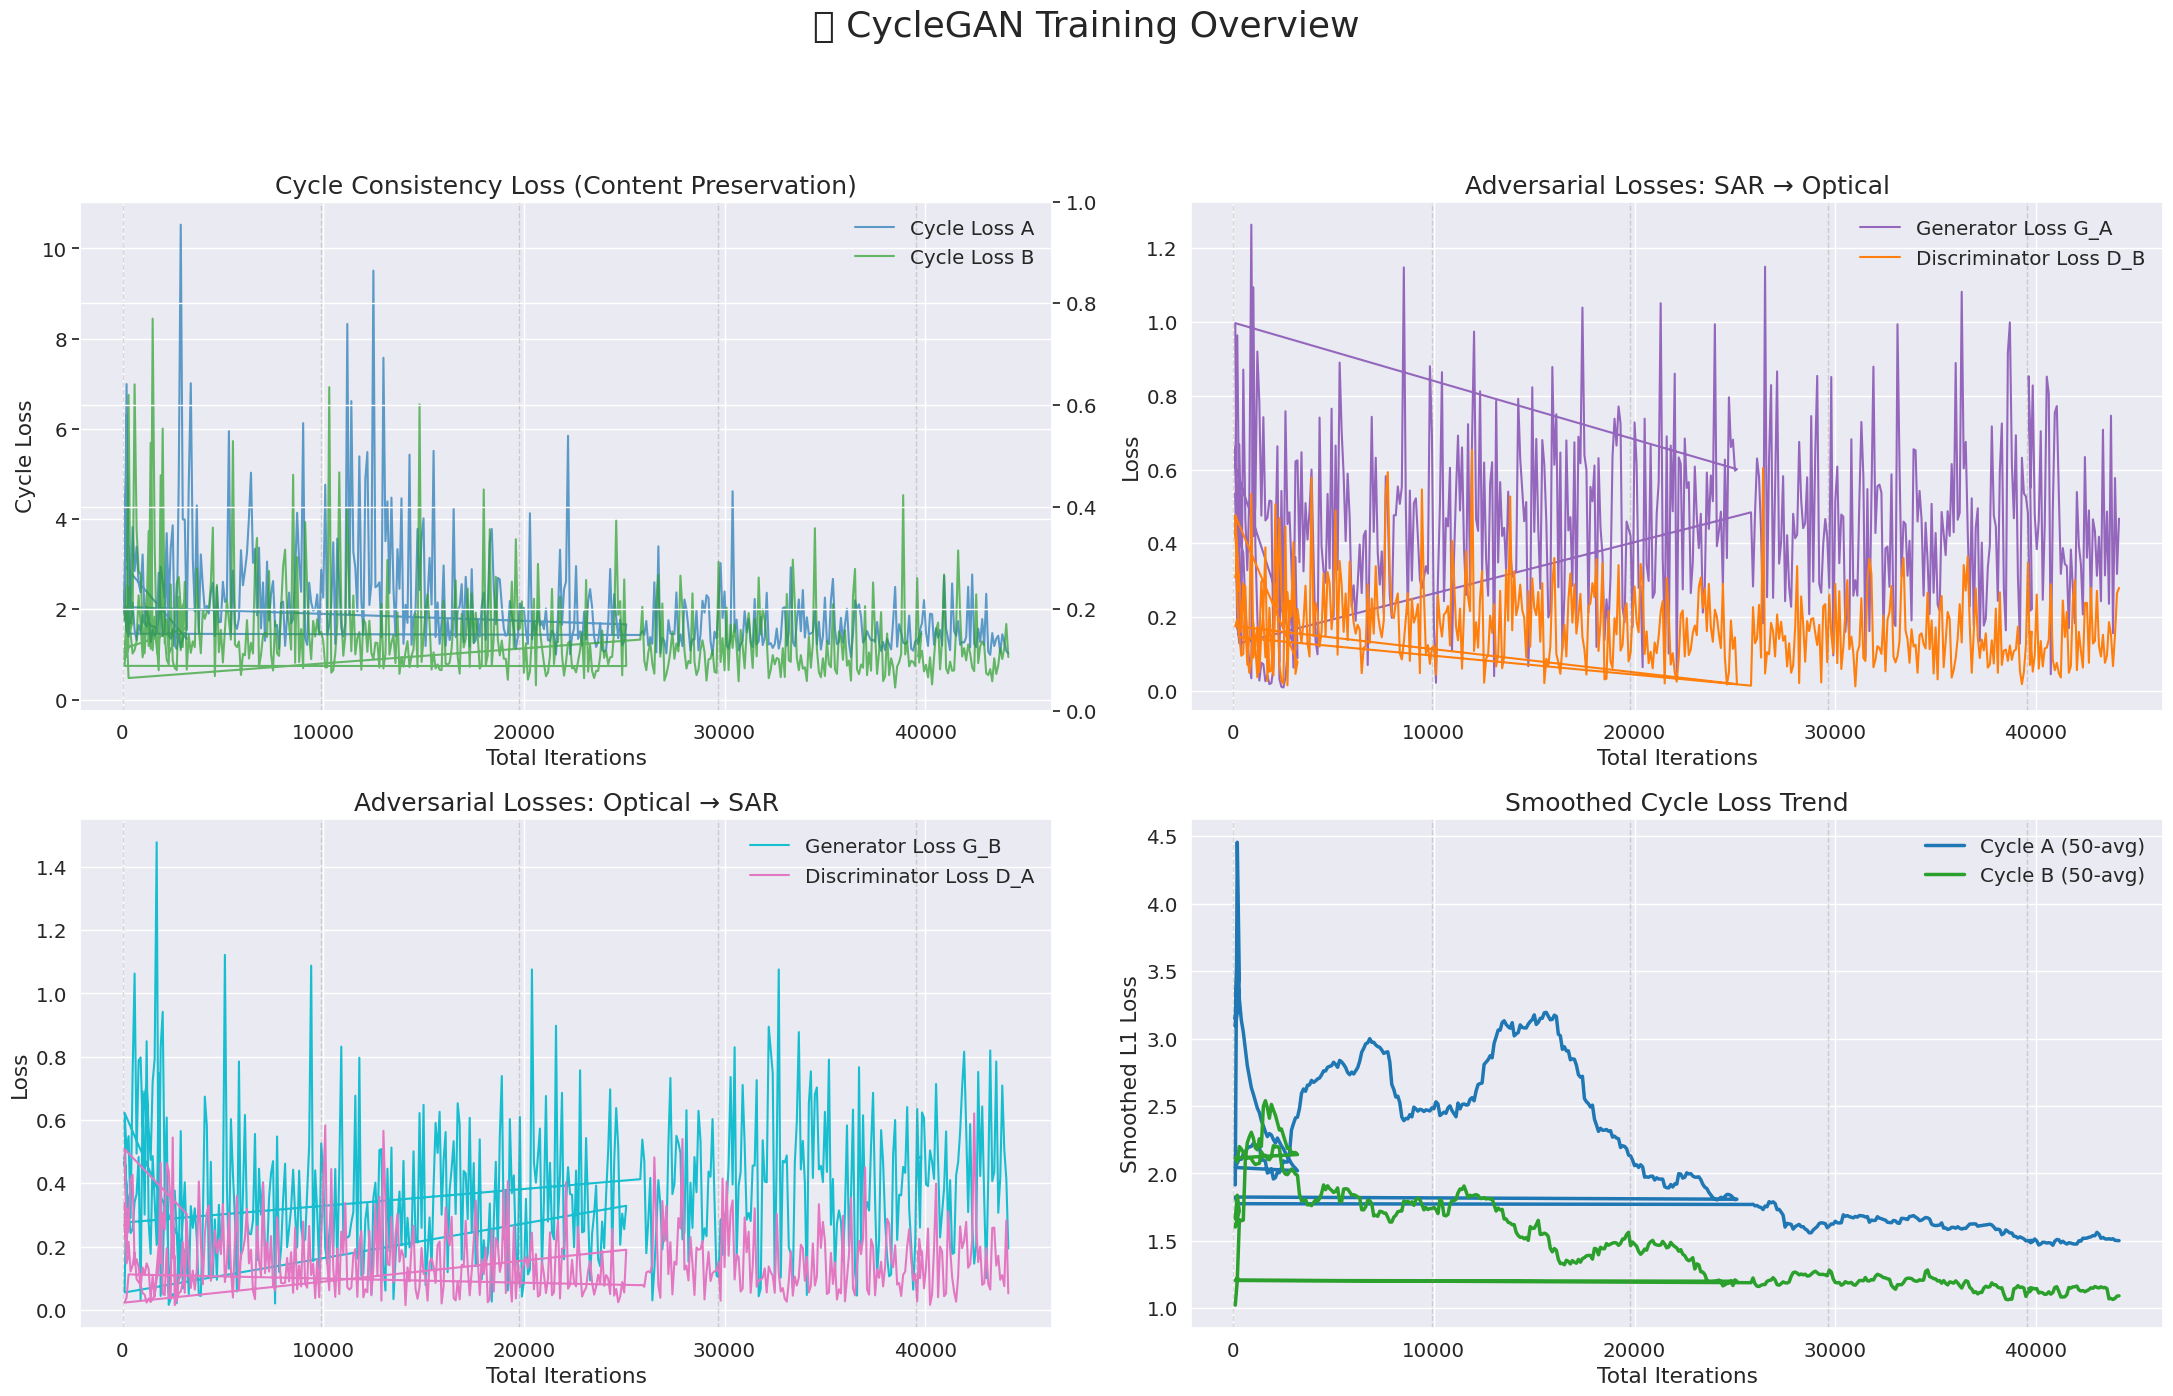

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- ⚙️ CONFIGURATION ---
# Path to your log file
log_file_path = "/content/drive/MyDrive/cyclegans/pytorch-CycleGAN-and-pix2pix/checkpoints/sar2rgb_winter_colab/loss_log.txt"
# --- END CONFIGURATION ---


# --- Data Loading ---
try:
    with open(log_file_path, 'r') as f:
        log_data = f.read()
    print(f"✅ Successfully loaded log file from: {log_file_path}")
except FileNotFoundError:
    print(f"❌ Error: Log file not found. Please check the path.")
    log_data = ""


# --- Data Parsing ---
if log_data:
    pattern = re.compile(
        r"epoch: (?P<epoch>\d+), iters: (?P<iters>\d+).*?"
        r"D_A: (?P<D_A>[\d.]+) G_A: (?P<G_A>[\d.]+) cycle_A: (?P<cycle_A>[\d.]+).*?"
        r"D_B: (?P<D_B>[\d.]+) G_B: (?P<G_B>[\d.]+) cycle_B: (?P<cycle_B>[\d.]+)"
        r"(?: perceptual: (?P<perceptual>[\d.]+))?"
    )

    data = []
    for line in log_data.strip().split('\n'):
        match = pattern.search(line)
        if match:
            data.append(match.groupdict())

    if not data:
        print("❌ Error: Could not find any valid loss data in the log file.")
    else:
        df = pd.DataFrame(data)
        # Convert all columns to numeric, coercing errors
        for col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

        ITERS_PER_EPOCH = 1977
        df['total_iters'] = (df['epoch'] - 1) * ITERS_PER_EPOCH + df['iters']

        # --- Plotting (Improved Style) ---
        sns.set(style="darkgrid", palette="Set2", font_scale=1.3)
        fig, axes = plt.subplots(2, 2, figsize=(22, 14))
        fig.suptitle('📈 CycleGAN Training Overview', fontsize=26, y=1.03)

        # Utility: vertical epoch markers
        def draw_epoch_lines(ax, total_iters, epoch_interval=5, color='gray', alpha=0.3):
            max_iter = total_iters.max()
            for i in range(0, int(max_iter), ITERS_PER_EPOCH * epoch_interval):
                ax.axvline(i, linestyle='--', color=color, alpha=alpha, linewidth=1)

        # 1. Content Preservation Losses
        ax1 = axes[0, 0]
        ax1_twin = ax1.twinx()
        p1 = ax1.plot(df['total_iters'], df['cycle_A'], label='Cycle Loss A', color='tab:blue', linewidth=1.5, alpha=0.7)
        p2 = ax1.plot(df['total_iters'], df['cycle_B'], label='Cycle Loss B', color='tab:green', linewidth=1.5, alpha=0.7)
        ax1.set_title('Cycle Consistency Loss (Content Preservation)', fontsize=18)
        ax1.set_xlabel('Total Iterations')
        ax1.set_ylabel('Cycle Loss')
        draw_epoch_lines(ax1, df['total_iters'])

        if 'perceptual' in df.columns and not df['perceptual'].isnull().all():
            p3 = ax1_twin.plot(df['total_iters'], df['perceptual'], label='Perceptual Loss', color='tab:red', linestyle='--', linewidth=1.5)
            ax1_twin.set_ylabel('Perceptual Loss (VGG)', color='tab:red')
            ax1_twin.tick_params(axis='y', labelcolor='tab:red')
            ax1.legend(p1 + p2 + p3, loc='upper right')
        else:
            ax1.legend(loc='upper right')

        # 2. Adversarial Losses (SAR → Optical)
        ax2 = axes[0, 1]
        ax2.plot(df['total_iters'], df['G_A'], label='Generator Loss G_A', color='tab:purple', linewidth=1.5)
        ax2.plot(df['total_iters'], df['D_B'], label='Discriminator Loss D_B', color='tab:orange', linewidth=1.5)
        ax2.set_title('Adversarial Losses: SAR → Optical', fontsize=18)
        ax2.set_xlabel('Total Iterations')
        ax2.set_ylabel('Loss')
        draw_epoch_lines(ax2, df['total_iters'])
        ax2.legend()

# 3. Adversarial Losses (Optical → SAR)
ax3 = axes[1, 0]
ax3.plot(df['total_iters'], df['G_B'], label='Generator Loss G_B', color='tab:cyan', linewidth=1.5)
ax3.plot(df['total_iters'], df['D_A'], label='Discriminator Loss D_A', color='tab:pink', linewidth=1.5)
ax3.set_title('Adversarial Losses: Optical → SAR', fontsize=18)
ax3.set_xlabel('Total Iterations')
ax3.set_ylabel('Loss')
draw_epoch_lines(ax3, df['total_iters'])
ax3.legend()

# 4. Smoothed Cycle Losses
ax4 = axes[1, 1]
window_size = 50
df['cycle_A_smooth'] = df['cycle_A'].rolling(window=window_size, min_periods=1).mean()
df['cycle_B_smooth'] = df['cycle_B'].rolling(window=window_size, min_periods=1).mean()
ax4.plot(df['total_iters'], df['cycle_A_smooth'], label=f'Cycle A ({window_size}-avg)', color='tab:blue', linewidth=2.5)
ax4.plot(df['total_iters'], df['cycle_B_smooth'], label=f'Cycle B ({window_size}-avg)', color='tab:green', linewidth=2.5)
ax4.set_title('Smoothed Cycle Loss Trend', fontsize=18)
ax4.set_xlabel('Total Iterations')
ax4.set_ylabel('Smoothed L1 Loss')
draw_epoch_lines(ax4, df['total_iters'])
ax4.legend()

# Beautify layout
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


change the epoch number to better analye the difference in quality of the converted images


/content/drive/MyDrive/cyclegans/pytorch-CycleGAN-and-pix2pix


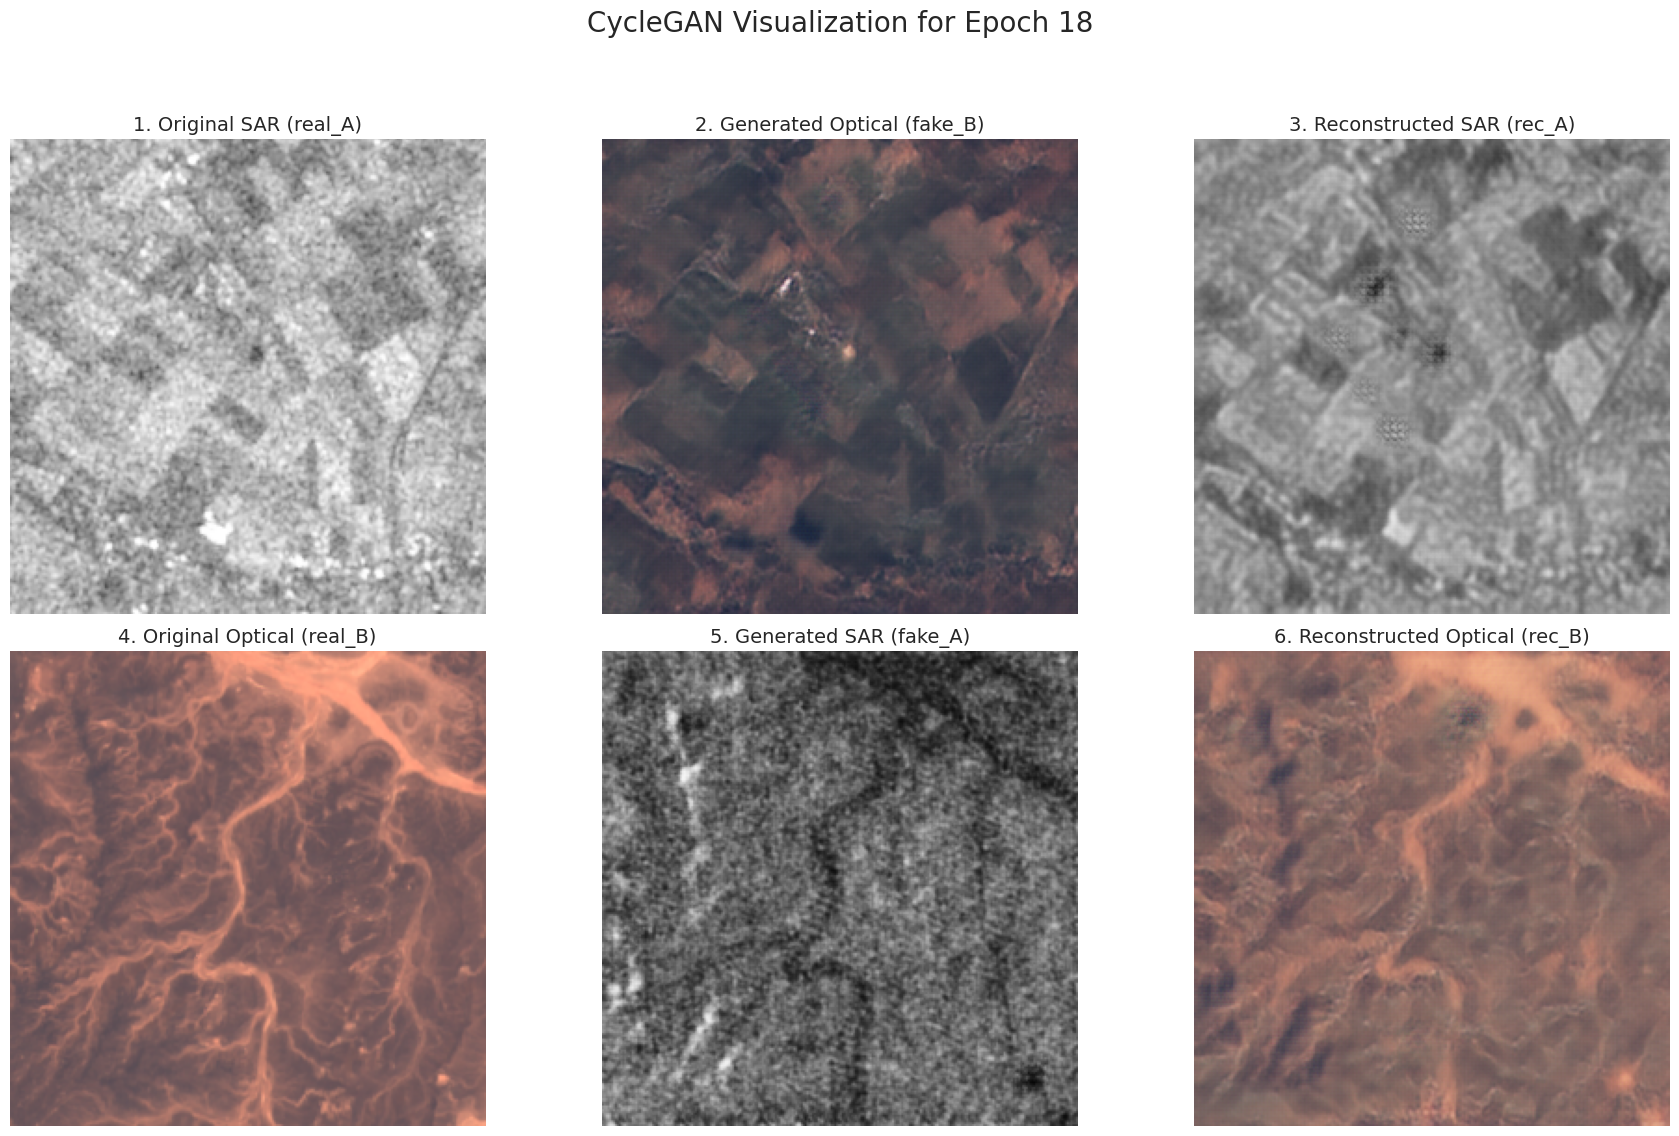

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# --- ⚙️ CONFIGURATION ---
# 1. The name of your training experiment folder.
EXPERIMENT_NAME = 'sar2rgb_winter_colab'

# 2. The epoch number you want to visualize.
EPOCH_TO_VISUALIZE = 18
# --- END CONFIGURATION ---
%cd /content/drive/MyDrive/cyclegans/pytorch-CycleGAN-and-pix2pix

# --- Path Setup ---
# This path points to the saved images for the specified experiment and epoch
images_dir = f"./checkpoints/{EXPERIMENT_NAME}/web/images/"
epoch_str = f"epoch{EPOCH_TO_VISUALIZE:03d}" # Formats the epoch number as '005'

# Define the filenames for both translation cycles
image_files = {
    'real_A': f'{epoch_str}_real_A.png',
    'fake_B': f'{epoch_str}_fake_B.png',
    'rec_A': f'{epoch_str}_rec_A.png',
    'real_B': f'{epoch_str}_real_B.png',
    'fake_A': f'{epoch_str}_fake_A.png',
    'rec_B': f'{epoch_str}_rec_B.png'
}

# --- Visualization ---
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle(f'CycleGAN Visualization for Epoch {EPOCH_TO_VISUALIZE}', fontsize=20)

# --- Top Row: SAR -> Optical -> SAR Cycle ---
try:
    # Original SAR (real_A)
    img_real_A = mpimg.imread(os.path.join(images_dir, image_files['real_A']))
    axes[0, 0].imshow(img_real_A)
    axes[0, 0].set_title('1. Original SAR (real_A)', fontsize=14)
    axes[0, 0].axis('off')

    # Generated Optical (fake_B)
    img_fake_B = mpimg.imread(os.path.join(images_dir, image_files['fake_B']))
    axes[0, 1].imshow(img_fake_B)
    axes[0, 1].set_title('2. Generated Optical (fake_B)', fontsize=14)
    axes[0, 1].axis('off')

    # Reconstructed SAR (rec_A)
    img_rec_A = mpimg.imread(os.path.join(images_dir, image_files['rec_A']))
    axes[0, 2].imshow(img_rec_A)
    axes[0, 2].set_title('3. Reconstructed SAR (rec_A)', fontsize=14)
    axes[0, 2].axis('off')
except FileNotFoundError:
    axes[0, 1].text(0.5, 0.5, 'Image file(s) not found for this epoch.', horizontalalignment='center', verticalalignment='center')


# --- Bottom Row: Optical -> SAR -> Optical Cycle ---
try:
    # Original Optical (real_B)
    img_real_B = mpimg.imread(os.path.join(images_dir, image_files['real_B']))
    axes[1, 0].imshow(img_real_B)
    axes[1, 0].set_title('4. Original Optical (real_B)', fontsize=14)
    axes[1, 0].axis('off')

    # Generated SAR (fake_A)
    img_fake_A = mpimg.imread(os.path.join(images_dir, image_files['fake_A']))
    axes[1, 1].imshow(img_fake_A)
    axes[1, 1].set_title('5. Generated SAR (fake_A)', fontsize=14)
    axes[1, 1].axis('off')

    # Reconstructed Optical (rec_B)
    img_rec_B = mpimg.imread(os.path.join(images_dir, image_files['rec_B']))
    axes[1, 2].imshow(img_rec_B)
    axes[1, 2].set_title('6. Reconstructed Optical (rec_B)', fontsize=14)
    axes[1, 2].axis('off')
except FileNotFoundError:
    axes[1, 1].text(0.5, 0.5, 'Image file(s) not found for this epoch.', horizontalalignment='center', verticalalignment='center')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# EVALUATION

In [ ]:
%%writefile evaluate.py
import os
import cv2
import numpy as np
from tqdm import tqdm
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

# --- Configuration ---
EPOCH_TO_EVALUATE = '20'
EXPERIMENT_NAME = 'sar2rgb_winter_colab'
GENERATED_DIR = f"./results/{EXPERIMENT_NAME}/test_{EPOCH_TO_EVALUATE}/images/"
GROUND_TRUTH_DIR = "/content/drive/MyDrive/cyclegans/pytorch-CycleGAN-and-pix2pix/preprocessed_test_data/eo_ground_truth_rgb"
# ---
def evaluate_model(generated_dir, ground_truth_dir):
    if not os.path.exists(generated_dir):
        print(f"❌ Error: Generated images directory not found at '{generated_dir}'")
        return

    # test.py saves images with a _fake_B.png suffix for CycleGAN
    generated_files = [f for f in os.listdir(generated_dir) if f.endswith('_fake_B.png')]
    if not generated_files:
        print(f"❌ Error: Found 0 images with the '_fake_B.png' suffix in '{generated_dir}'. Please check the folder and filenames.")
        return

    print(f"Found {len(generated_files)} generated images. Starting evaluation...")
    psnr_scores, ssim_scores = [], []

    for fname in tqdm(generated_files, desc="Evaluating Images"):
        generated_path = os.path.join(generated_dir, fname)
        generated_image = cv2.cvtColor(cv2.imread(generated_path), cv2.COLOR_BGR2RGB)

        # Construct the corresponding ground truth filename
        gt_fname = fname.replace('_s1_', '_s2_').replace('_fake_B.png', '.npy')
        gt_path = os.path.join(ground_truth_dir, gt_fname)

        if os.path.exists(gt_path):
            gt_npy = np.load(gt_path)
            # De-normalize from [-1, 1] to [0, 255]
            gt_image = ((gt_npy + 1) / 2.0 * 255.0).astype(np.uint8)

            # Calculate metrics
            current_ssim = ssim(gt_image, generated_image, channel_axis=2, data_range=255)
            current_psnr = psnr(gt_image, generated_image, data_range=255)
            ssim_scores.append(current_ssim)
            psnr_scores.append(current_psnr)

    if ssim_scores:
        print("\n--- Final Evaluation Results ---")
        print(f"Epoch Tested: {EPOCH_TO_EVALUATE}")
        print(f"Images Evaluated: {len(ssim_scores)}")
        print(f"Average SSIM: {np.mean(ssim_scores):.4f} (Closer to 1 is better)")
        print(f"Average PSNR: {np.mean(psnr_scores):.4f} dB (Higher is better)")
        print("--------------------------------")

if __name__ == "__main__":
    evaluate_model(GENERATED_DIR, GROUND_TRUTH_DIR)

Overwriting evaluate.py


In [ ]:

!python evaluate.py

Found 400 generated images. Starting evaluation...
Evaluating Images: 100% 400/400 [06:54<00:00,  1.04s/it]

--- Final Evaluation Results ---
Epoch Tested: 10
Images Evaluated: 400
Average SSIM: 0.4854 (Closer to 1 is better)
Average PSNR: 18.7006 dB (Higher is better)
--------------------------------


In [ ]:
!python evaluate.py

Found 400 generated images. Starting evaluation...
Evaluating Images: 100% 400/400 [00:32<00:00, 12.48it/s]

--- Final Evaluation Results ---
Epoch Tested: 20
Images Evaluated: 400
Average SSIM: 0.5151 (Closer to 1 is better)
Average PSNR: 17.6797 dB (Higher is better)
--------------------------------


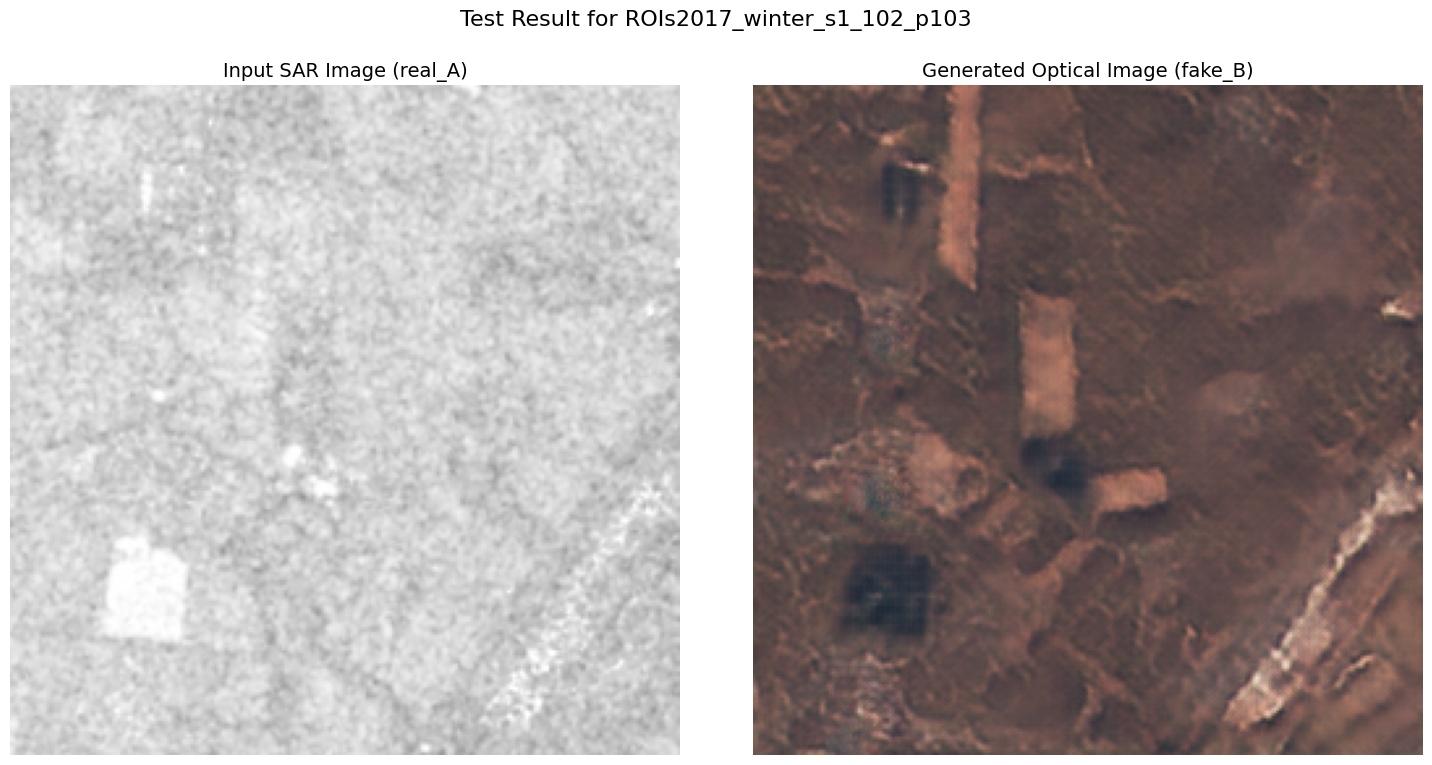

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# --- ⚙️ CONFIGURATION ---
# 1. The name of your experiment.
EXPERIMENT_NAME = 'sar2rgb_winter_colab'

# 2. The epoch number you tested.
EPOCH_TESTED = '10'

# 3. Paste the base name of the image you want to see.
#    (e.g., for 'ROIs2017_winter_s1_102_p100_real_A.png', use 'ROIs2017_winter_s1_102_p100')
IMAGE_BASENAME = 'ROIs2017_winter_s1_102_p103'
# --- END CONFIGURATION ---


# --- Path Setup ---
images_dir = f"./results/{EXPERIMENT_NAME}/test_{EPOCH_TESTED}/images/"

# Construct the full filenames
real_A_file = f"{IMAGE_BASENAME}_real_A.png"
fake_B_file = f"{IMAGE_BASENAME}_fake_B.png"

real_A_path = os.path.join(images_dir, real_A_file)
fake_B_path = os.path.join(images_dir, fake_B_file)

# --- Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle(f'Test Result for {IMAGE_BASENAME}', fontsize=16)

try:
    # --- Original SAR (real_A) ---
    img_real_A = mpimg.imread(real_A_path)
    axes[0].imshow(img_real_A)
    axes[0].set_title('Input SAR Image (real_A)', fontsize=14)
    axes[0].axis('off')

    # --- Generated Optical (fake_B) ---
    img_fake_B = mpimg.imread(fake_B_path)
    axes[1].imshow(img_fake_B)
    axes[1].set_title('Generated Optical Image (fake_B)', fontsize=14)
    axes[1].axis('off')

except FileNotFoundError as e:
    print(f"❌ Error: Could not find an image file. Please check your configuration.")
    print(f"Missing file: {e.filename}")
    # Hide the empty plot frames on error
    axes[0].axis('off')
    axes[1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()